In [1]:
# load packages

suppressPackageStartupMessages(library("sva"))
suppressPackageStartupMessages(library("preprocessCore"))

source("/Volumes/Expansion/Thesis Work/Supplementary Files/homogenize_data/homogenize_data.R")

In [2]:
# define directories

root_dir <- "/Volumes/Expansion/Thesis Work/Results/preprocessed_results2" 
batch_correction <- "eb" # "standardize"
exprs_dir <-  paste0(root_dir,"/exprs/")
output_dir <- paste0(root_dir,"/exprs_homogenized/")

In [3]:
# define functions to run "homogenize_data.R" to remove batch effects

getBasename <- function(file, keep_path = FALSE){
    if (!keep_path) {
        file <- unlist(strsplit(file,"/"))
        file <- file[length(file)]
    }
    basename <- c(unlist(strsplit(file,".", fixed = TRUE)))
    basename <- paste(basename[seq(1,length(basename))-1],collapse=".")
    return (basename)
}

plotMDS <- function(datMat1,datMat2,label1, label2,title){
    # e.g. plotMDS(trainExprMat,testExprMat,"train","test")
    # get common rows
    common <- intersect(rownames(datMat1), rownames(datMat2))  
    datMat1 <- datMat1[common,]
    datMat2 <- datMat2[common,]
    # merge 
    dataMat <- cbind(datMat1,datMat2)
    dim(dataMat)
    whichbatch <- as.factor(c(rep(label1, ncol(datMat1)), rep(label2, ncol(datMat2))))
    # plot MDS
    mds = cmdscale(dist(t(dataMat)),eig=TRUE)
    plot(mds$points,col=as.numeric(whichbatch),pch=19,main=paste0(c("MDS ",title)),
         xlab = "Coord.1",ylab = "Coord.2" )
    legend("topright",legend = levels(whichbatch),
           fill = as.numeric(as.factor(levels(whichbatch))))
}

run_homogenization <- function(testfile, trainfile,output_dir = FALSE,batch_correction="eb"){
    ###  read files and drop NA rows 
    trainExprMat <- read.csv(trainfile,sep="\t",row.names=1,check.names=F)
    trainExprMat <- trainExprMat[rowSums(is.na(trainExprMat)) <= 0,]
    #boxplot(trainExprMat[,c(seq(1,50))] ,range=0, xlab = "Array", main = "Boxplot", ylab = "Intensity")

    testExprMat <- read.csv(testfile,sep="\t",row.names=1,check.names=F)
    # drop NA rows 
    testExprMat <- testExprMat[rowSums(is.na(testExprMat)) <= 0,]
    #boxplot(testExprMat ,range=0, xlab = "Array", main = "Boxplot", ylab = "Intensity")

    ###  get common rows 
    #common <- intersect(rownames(trainExprMat ), rownames(testExprMat ))  
    #trainExprMat <- trainExprMat[common,]
    #testExprMat <- testExprMat[common,]
    
    ### homogenize 
    homData <- homogenizeData(as.matrix(testExprMat), as.matrix(trainExprMat), 
                              batchCorrect=batch_correction, selection=-1, printOutput=TRUE)
    
    ### Plot MDS before and after homogenization 
    options(repr.plot.width = 20, repr.plot.height = 8)
    par(mfrow=c(1,2))
    title <- paste0(getBasename(testfile),"+",getBasename(trainfile)," ","before")
    plotMDS(trainExprMat,testExprMat,"train","test",title)
    title <- paste0(getBasename(testfile),"+",getBasename(trainfile)," ","after")
    plotMDS(homData$train,homData$test,"train","test",title)
    
    ### hierarchical clustering of testing sample before and after homogenization  
    #par(mfrow=c(2,1),cex.axis = 0.5,mai=c(0.0,0.8,0.8,0.4))
    #tree <- hclust(dist(t(testExprMat)), method="average")
    #plot(tree, main = "before",xlab = "")
    #tree <- hclust(dist(t(homData$test)), method="average")
    #plot(tree, main = "after",xlab = "")
    
    homData$train <- cbind("ENTREZID" = rownames(homData$train), homData$train)
    homData$test <- cbind("ENTREZID" = rownames(homData$test), homData$test)
    ### write output 
    if (output_dir != FALSE){
     test_output <- paste0(output_dir,getBasename(testfile),".",batch_correction,"_with.",getBasename(trainfile),".tsv")
     train_output <- paste0(output_dir,getBasename(trainfile),".",batch_correction,"_with.",getBasename(testfile),".tsv")
     print(c("write results to ",test_output,train_output))
     write.table(homData$train, file = train_output,na="",quote = FALSE,sep="\t",row.names = FALSE)
     write.table(homData$test, file = test_output,na="",quote = FALSE,sep="\t",row.names = FALSE)   
    }
    return (homData)
}

[1] "/Volumes/Expansion/Thesis Work/Results/preprocessed_results2/exprs/GDSC_exprs.Cetuximab.tsv"
[2] "/Volumes/Expansion/Thesis Work/Results/preprocessed_results2/exprs/TCGA_exprs.Cetuximab.tsv"

 18197  gene identifiers overlap between the supplied expression matrices... 
 Found 579 genes with uniform expression within a single batch (all zeros); these will not be adjusted for batch.


Found2batches

Adjusting for0covariate(s) or covariate level(s)

Standardizing Data across genes

Fitting L/S model and finding priors

Finding parametric adjustments

Adjusting the Data




[1] "write results to "                                                                                                                   
[2] "/Volumes/Expansion/Thesis Work/Results/preprocessed_results2/exprs_homogenized/GDSC_exprs.Cetuximab.eb_with.TCGA_exprs.Cetuximab.tsv"
[3] "/Volumes/Expansion/Thesis Work/Results/preprocessed_results2/exprs_homogenized/TCGA_exprs.Cetuximab.eb_with.GDSC_exprs.Cetuximab.tsv"
[1] "/Volumes/Expansion/Thesis Work/Results/preprocessed_results2/exprs/TCGA_exprs.Cetuximab.tsv"
[2] "/Volumes/Expansion/Thesis Work/Results/preprocessed_results2/exprs/GDSC_exprs.Cetuximab.tsv"

 18197  gene identifiers overlap between the supplied expression matrices... 
 Found 579 genes with uniform expression within a single batch (all zeros); these will not be adjusted for batch.


Found2batches

Adjusting for0covariate(s) or covariate level(s)

Standardizing Data across genes

Fitting L/S model and finding priors

Finding parametric adjustments

Adjusting the Data




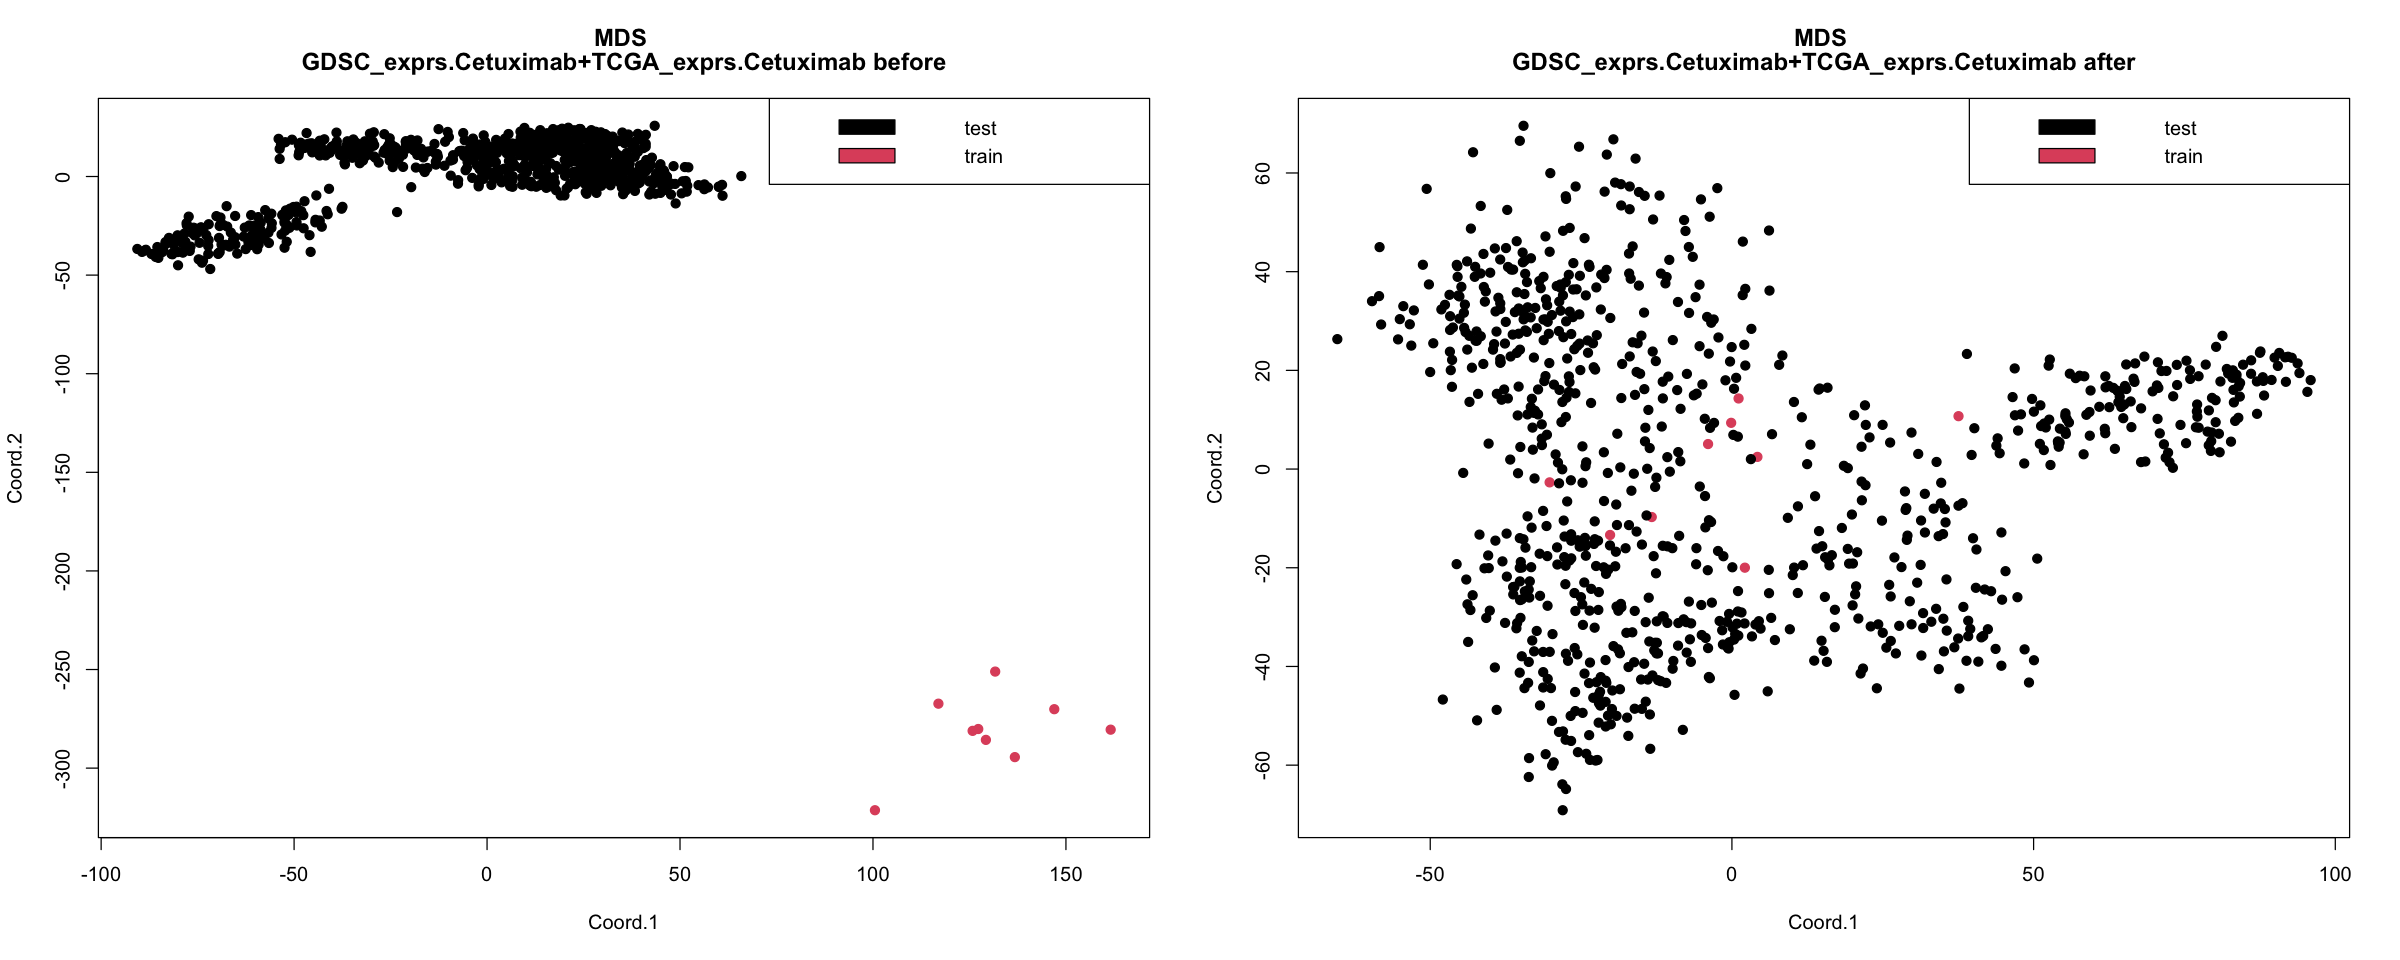

[1] "write results to "                                                                                                                   
[2] "/Volumes/Expansion/Thesis Work/Results/preprocessed_results2/exprs_homogenized/TCGA_exprs.Cetuximab.eb_with.GDSC_exprs.Cetuximab.tsv"
[3] "/Volumes/Expansion/Thesis Work/Results/preprocessed_results2/exprs_homogenized/GDSC_exprs.Cetuximab.eb_with.TCGA_exprs.Cetuximab.tsv"
[1] "/Volumes/Expansion/Thesis Work/Results/preprocessed_results2/exprs/GDSC_exprs.Cetuximab.tsv"
[2] "/Volumes/Expansion/Thesis Work/Results/preprocessed_results2/exprs/PDX_exprs.Cetuximab.tsv" 

 18189  gene identifiers overlap between the supplied expression matrices... 
 Found 347 genes with uniform expression within a single batch (all zeros); these will not be adjusted for batch.


Found2batches

Adjusting for0covariate(s) or covariate level(s)

Standardizing Data across genes

Fitting L/S model and finding priors

Finding parametric adjustments

Adjusting the Data




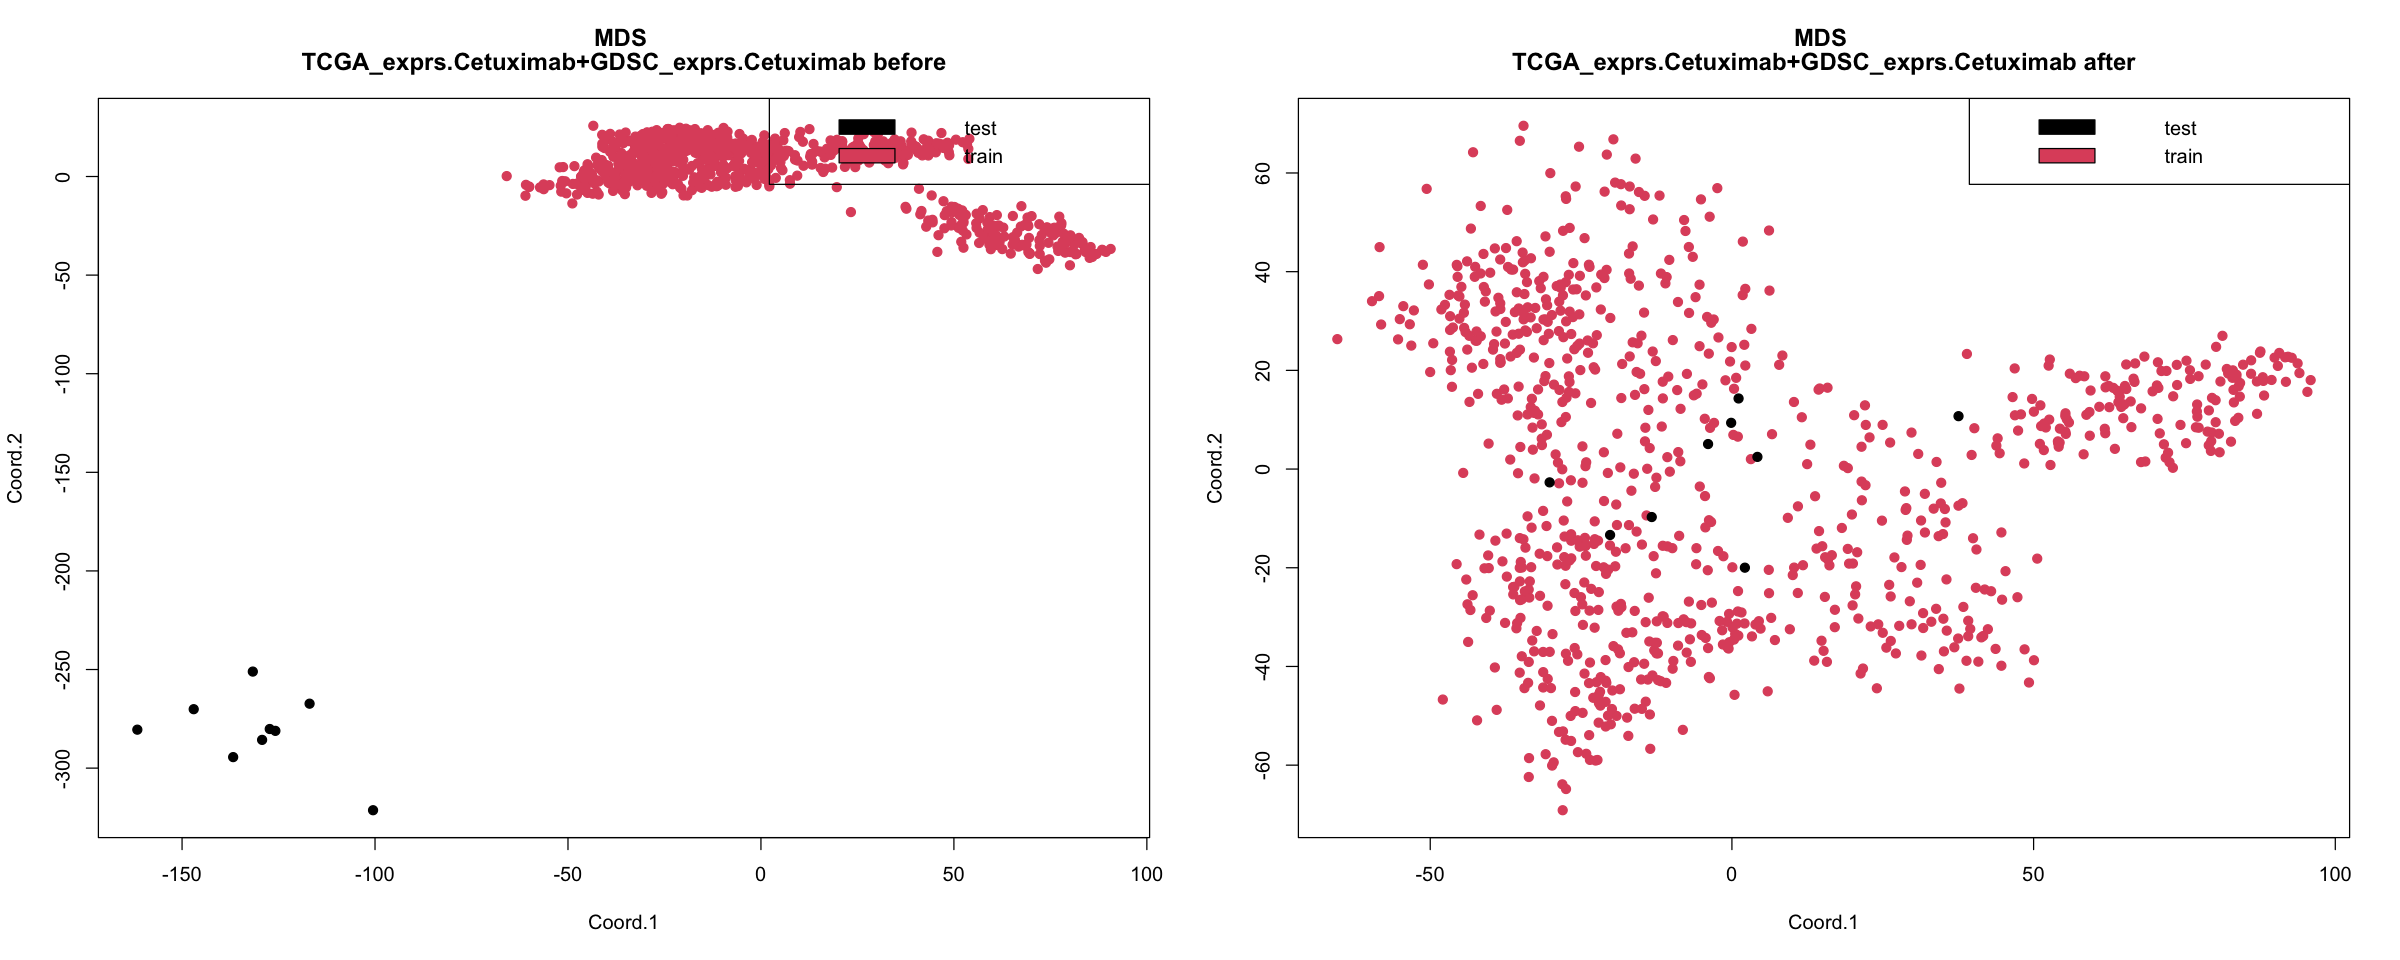

[1] "write results to "                                                                                                                  
[2] "/Volumes/Expansion/Thesis Work/Results/preprocessed_results2/exprs_homogenized/GDSC_exprs.Cetuximab.eb_with.PDX_exprs.Cetuximab.tsv"
[3] "/Volumes/Expansion/Thesis Work/Results/preprocessed_results2/exprs_homogenized/PDX_exprs.Cetuximab.eb_with.GDSC_exprs.Cetuximab.tsv"
[1] "/Volumes/Expansion/Thesis Work/Results/preprocessed_results2/exprs/PDX_exprs.Cetuximab.tsv" 
[2] "/Volumes/Expansion/Thesis Work/Results/preprocessed_results2/exprs/GDSC_exprs.Cetuximab.tsv"

 18189  gene identifiers overlap between the supplied expression matrices... 
 Found 347 genes with uniform expression within a single batch (all zeros); these will not be adjusted for batch.


Found2batches

Adjusting for0covariate(s) or covariate level(s)

Standardizing Data across genes

Fitting L/S model and finding priors

Finding parametric adjustments

Adjusting the Data




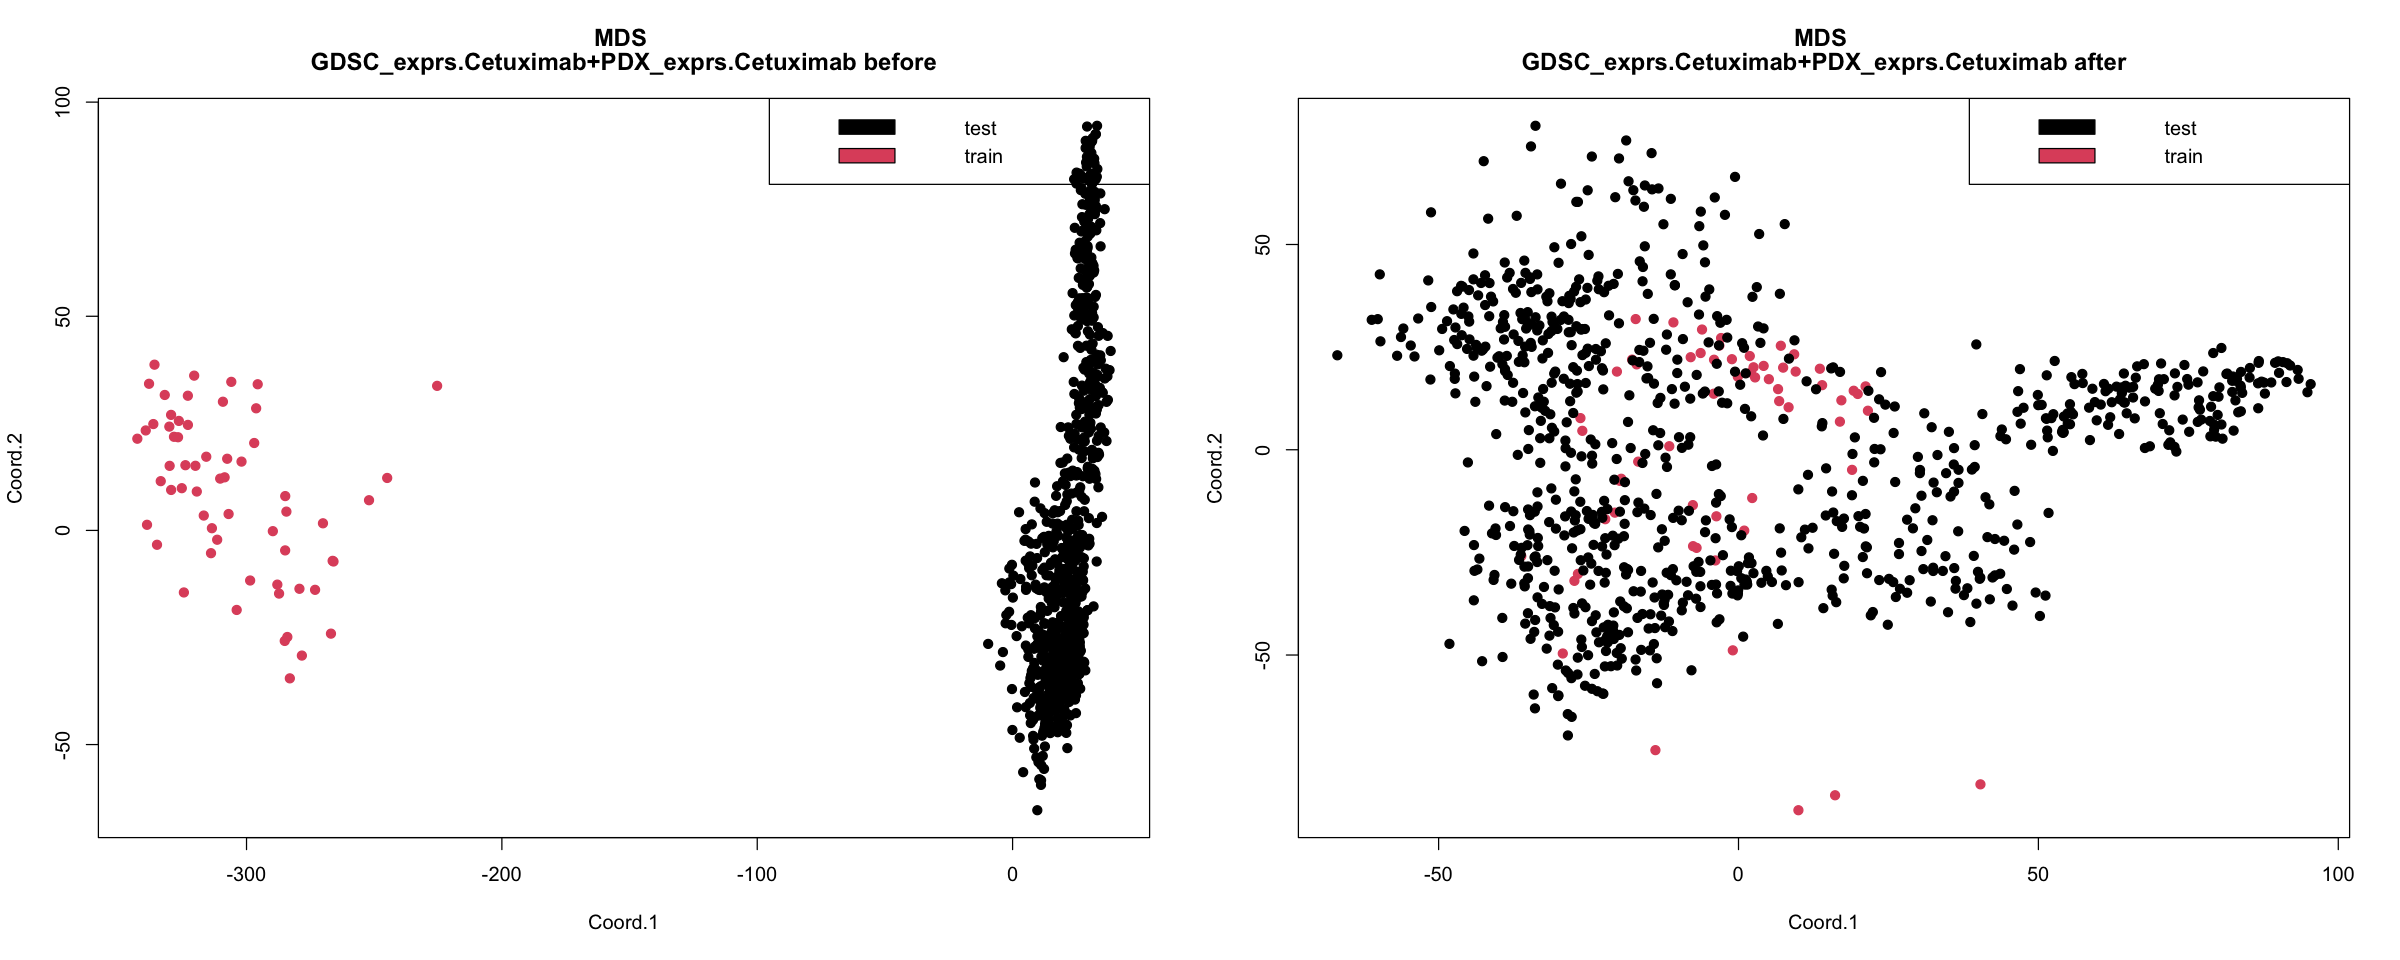

[1] "write results to "                                                                                                                  
[2] "/Volumes/Expansion/Thesis Work/Results/preprocessed_results2/exprs_homogenized/PDX_exprs.Cetuximab.eb_with.GDSC_exprs.Cetuximab.tsv"
[3] "/Volumes/Expansion/Thesis Work/Results/preprocessed_results2/exprs_homogenized/GDSC_exprs.Cetuximab.eb_with.PDX_exprs.Cetuximab.tsv"
[1] "/Volumes/Expansion/Thesis Work/Results/preprocessed_results2/exprs/TCGA_exprs.Doxorubicin.tsv"
[2] "/Volumes/Expansion/Thesis Work/Results/preprocessed_results2/exprs/GDSC_exprs.Doxorubicin.tsv"

 18197  gene identifiers overlap between the supplied expression matrices... 
 Found 445 genes with uniform expression within a single batch (all zeros); these will not be adjusted for batch.


Found2batches

Adjusting for0covariate(s) or covariate level(s)

Standardizing Data across genes

Fitting L/S model and finding priors

Finding parametric adjustments

Adjusting the Data




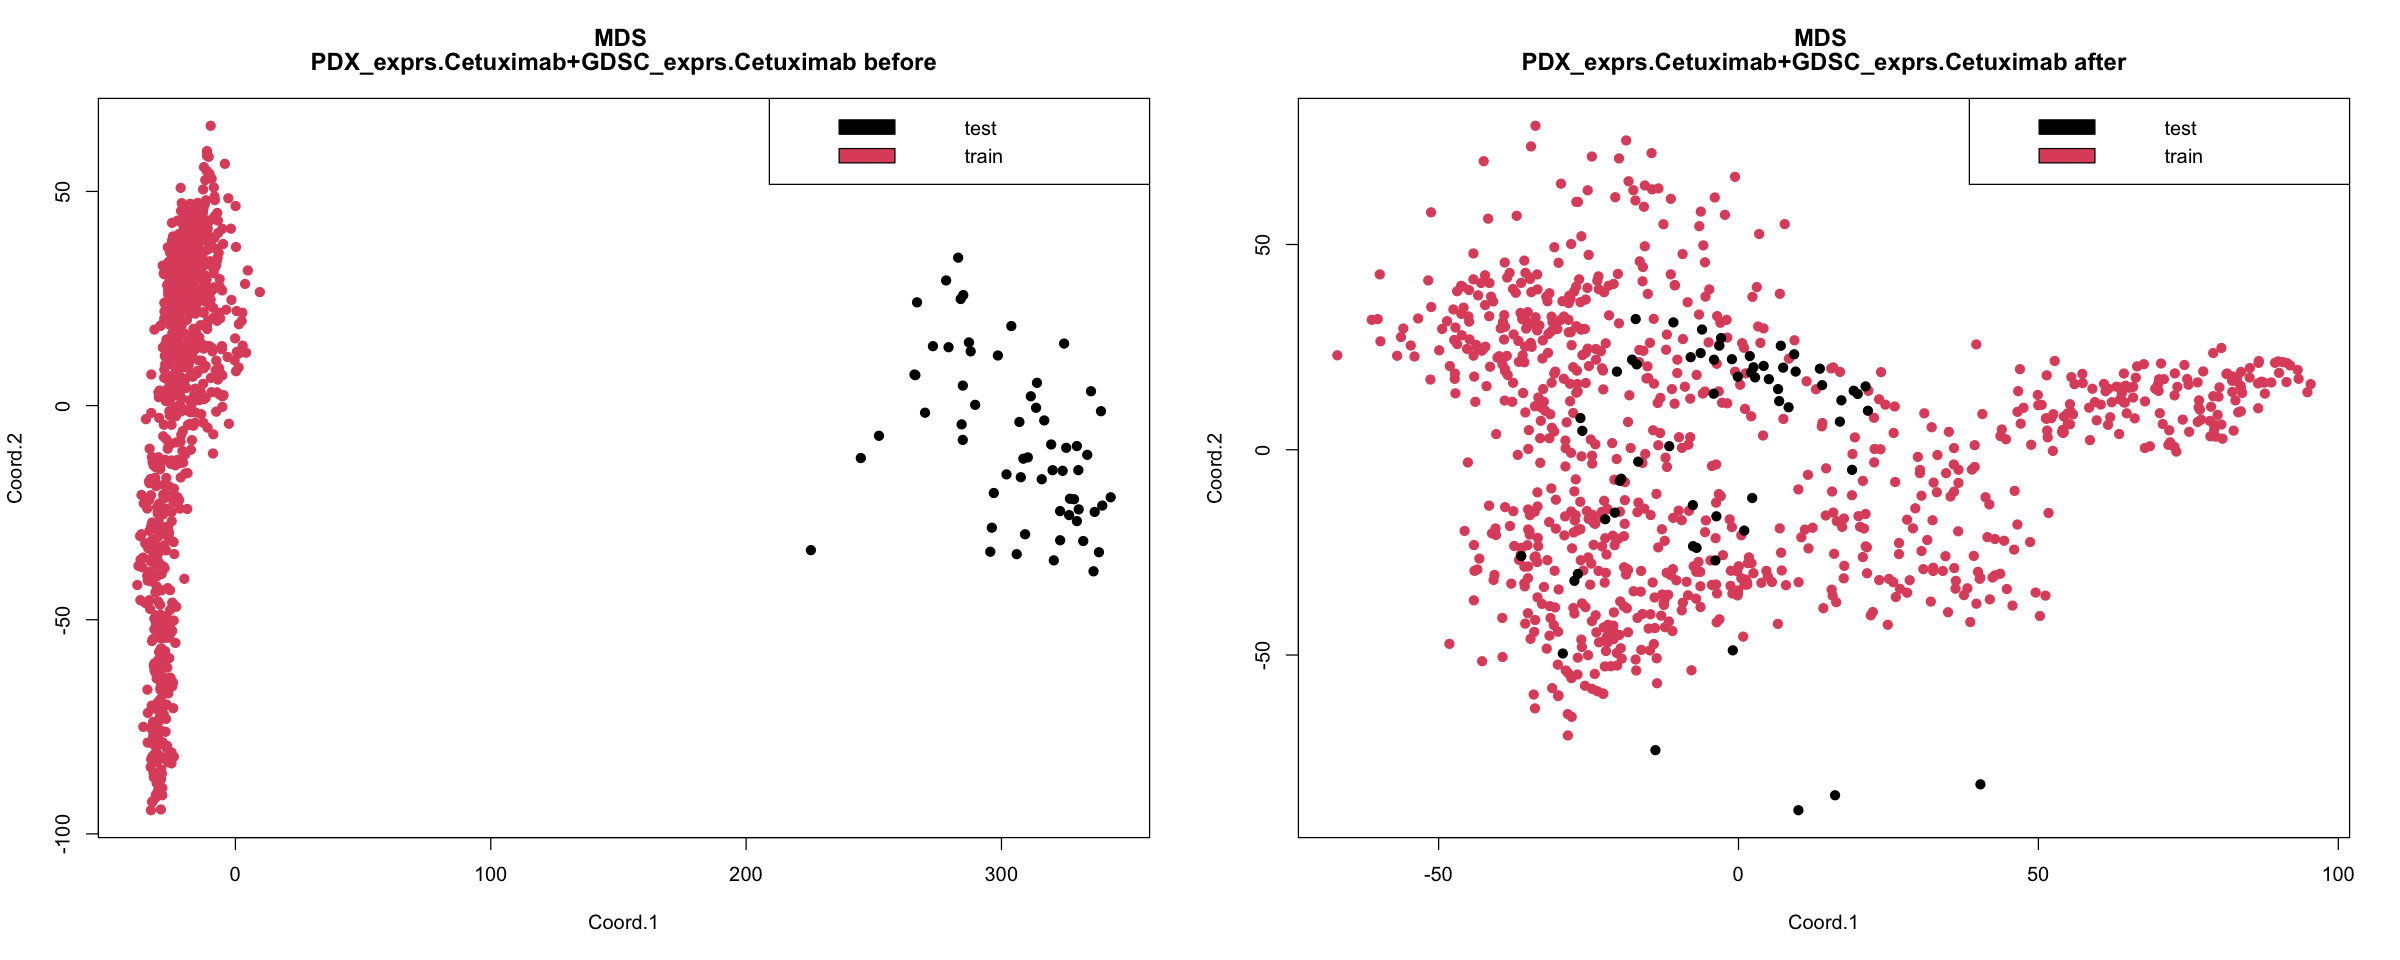

[1] "write results to "                                                                                                                       
[2] "/Volumes/Expansion/Thesis Work/Results/preprocessed_results2/exprs_homogenized/TCGA_exprs.Doxorubicin.eb_with.GDSC_exprs.Doxorubicin.tsv"
[3] "/Volumes/Expansion/Thesis Work/Results/preprocessed_results2/exprs_homogenized/GDSC_exprs.Doxorubicin.eb_with.TCGA_exprs.Doxorubicin.tsv"
[1] "/Volumes/Expansion/Thesis Work/Results/preprocessed_results2/exprs/GDSC_exprs.Doxorubicin.tsv"
[2] "/Volumes/Expansion/Thesis Work/Results/preprocessed_results2/exprs/TCGA_exprs.Doxorubicin.tsv"

 18197  gene identifiers overlap between the supplied expression matrices... 
 Found 445 genes with uniform expression within a single batch (all zeros); these will not be adjusted for batch.


Found2batches

Adjusting for0covariate(s) or covariate level(s)

Standardizing Data across genes

Fitting L/S model and finding priors

Finding parametric adjustments

Adjusting the Data




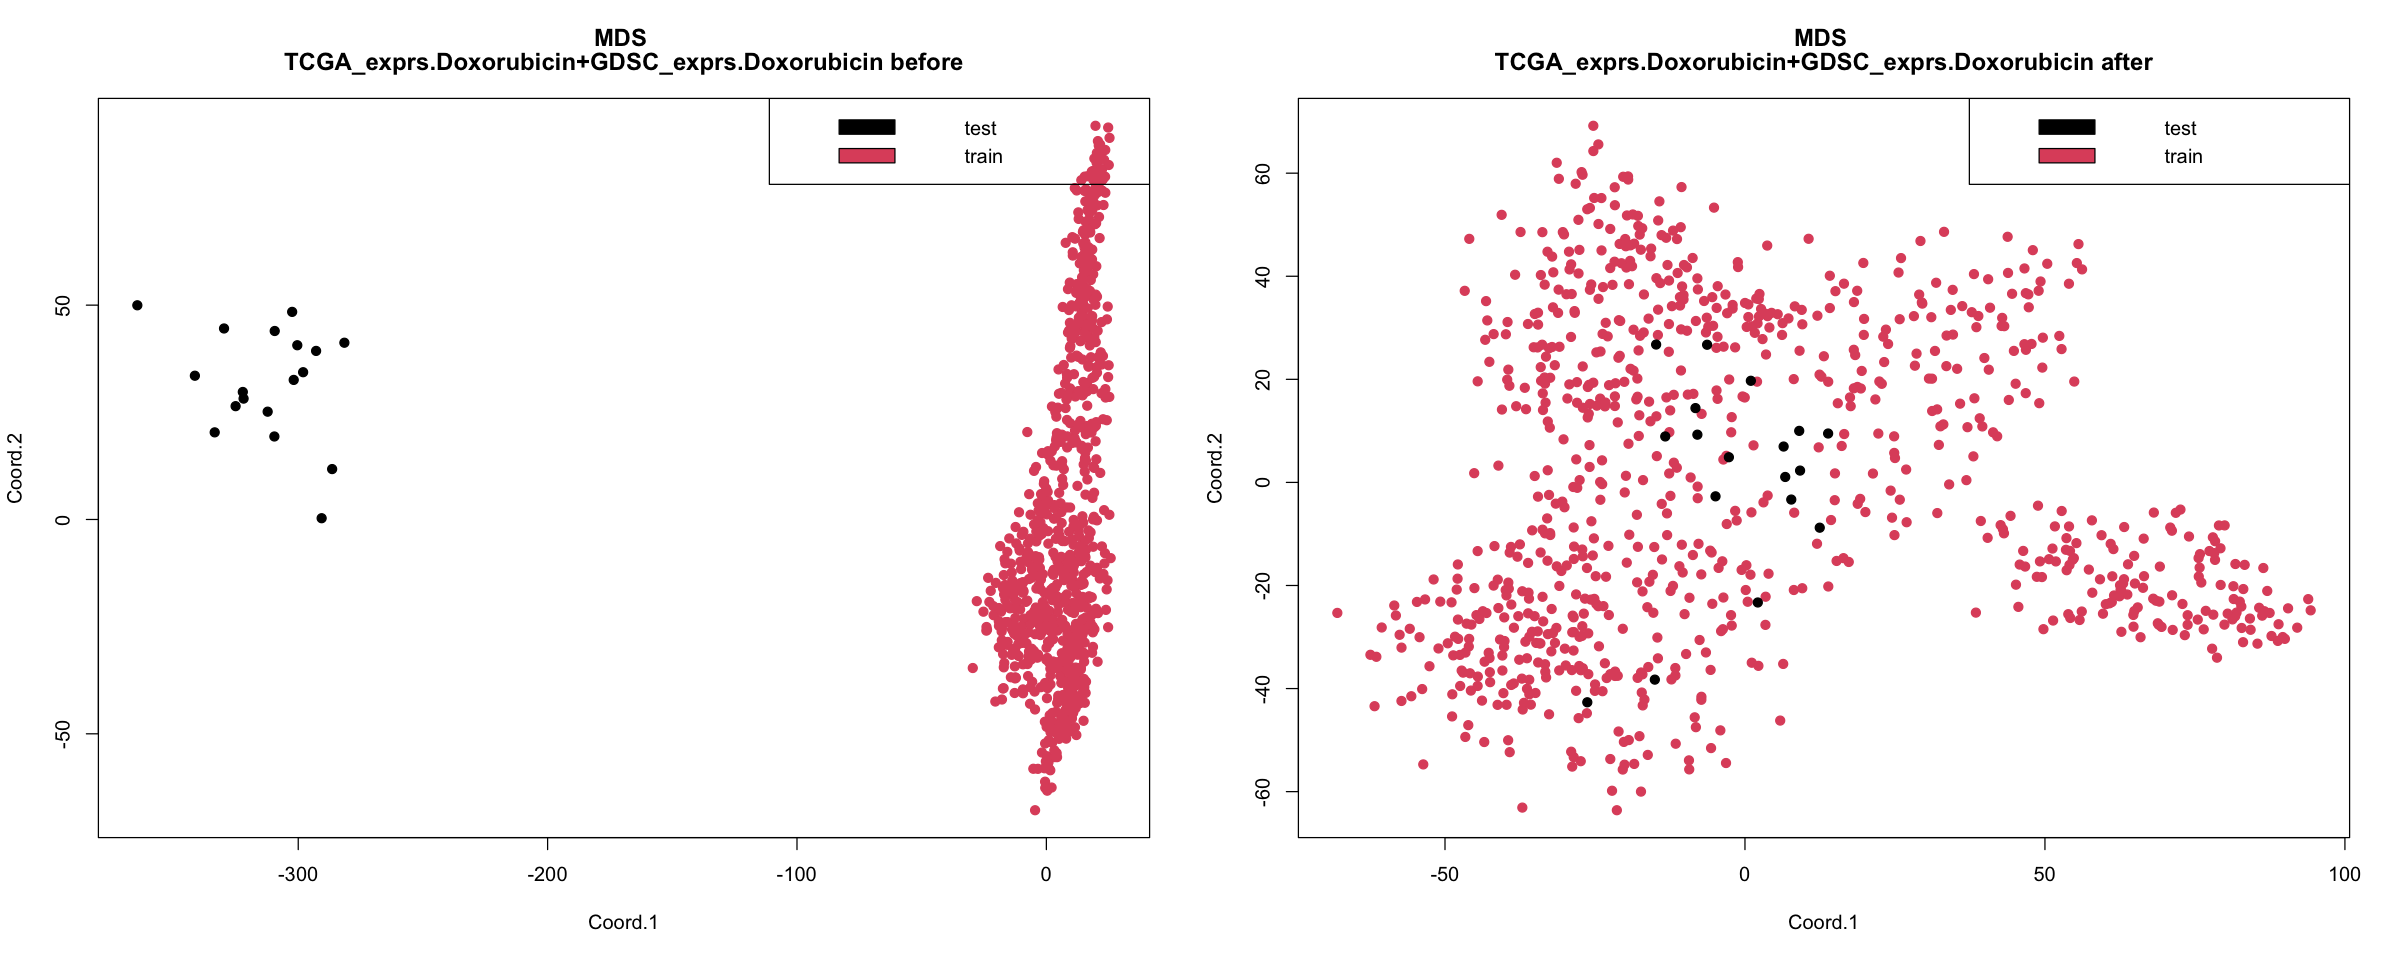

[1] "write results to "                                                                                                                       
[2] "/Volumes/Expansion/Thesis Work/Results/preprocessed_results2/exprs_homogenized/GDSC_exprs.Doxorubicin.eb_with.TCGA_exprs.Doxorubicin.tsv"
[3] "/Volumes/Expansion/Thesis Work/Results/preprocessed_results2/exprs_homogenized/TCGA_exprs.Doxorubicin.eb_with.GDSC_exprs.Doxorubicin.tsv"
[1] "/Volumes/Expansion/Thesis Work/Results/preprocessed_results2/exprs/TCGA_exprs.Gemcitabine.tsv"
[2] "/Volumes/Expansion/Thesis Work/Results/preprocessed_results2/exprs/GDSC_exprs.Gemcitabine.tsv"

 18197  gene identifiers overlap between the supplied expression matrices... 
 Found 227 genes with uniform expression within a single batch (all zeros); these will not be adjusted for batch.


Found2batches

Adjusting for0covariate(s) or covariate level(s)

Standardizing Data across genes

Fitting L/S model and finding priors

Finding parametric adjustments

Adjusting the Data




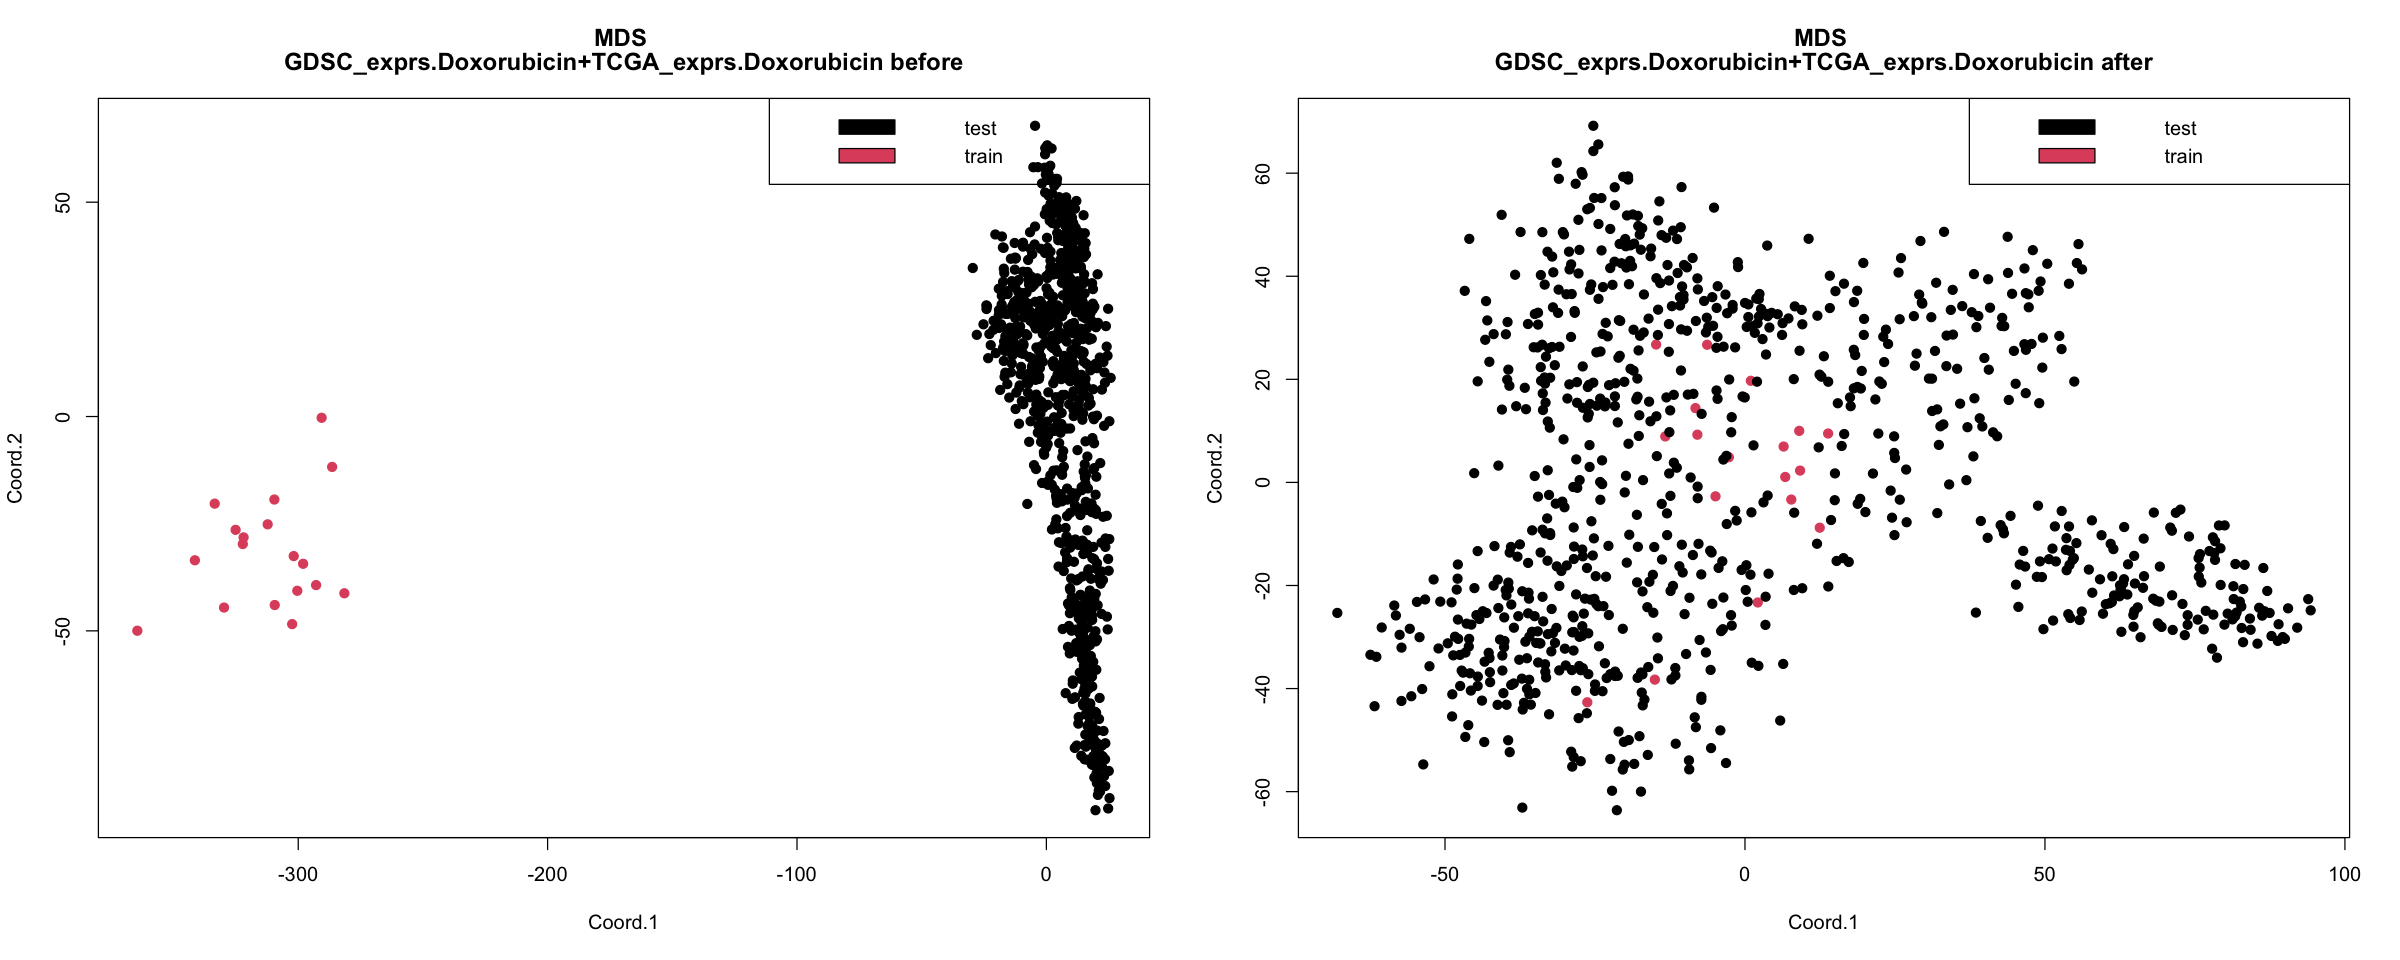

[1] "write results to "                                                                                                                       
[2] "/Volumes/Expansion/Thesis Work/Results/preprocessed_results2/exprs_homogenized/TCGA_exprs.Gemcitabine.eb_with.GDSC_exprs.Gemcitabine.tsv"
[3] "/Volumes/Expansion/Thesis Work/Results/preprocessed_results2/exprs_homogenized/GDSC_exprs.Gemcitabine.eb_with.TCGA_exprs.Gemcitabine.tsv"
[1] "/Volumes/Expansion/Thesis Work/Results/preprocessed_results2/exprs/GDSC_exprs.Gemcitabine.tsv"
[2] "/Volumes/Expansion/Thesis Work/Results/preprocessed_results2/exprs/TCGA_exprs.Gemcitabine.tsv"

 18197  gene identifiers overlap between the supplied expression matrices... 
 Found 227 genes with uniform expression within a single batch (all zeros); these will not be adjusted for batch.


Found2batches

Adjusting for0covariate(s) or covariate level(s)

Standardizing Data across genes

Fitting L/S model and finding priors

Finding parametric adjustments

Adjusting the Data




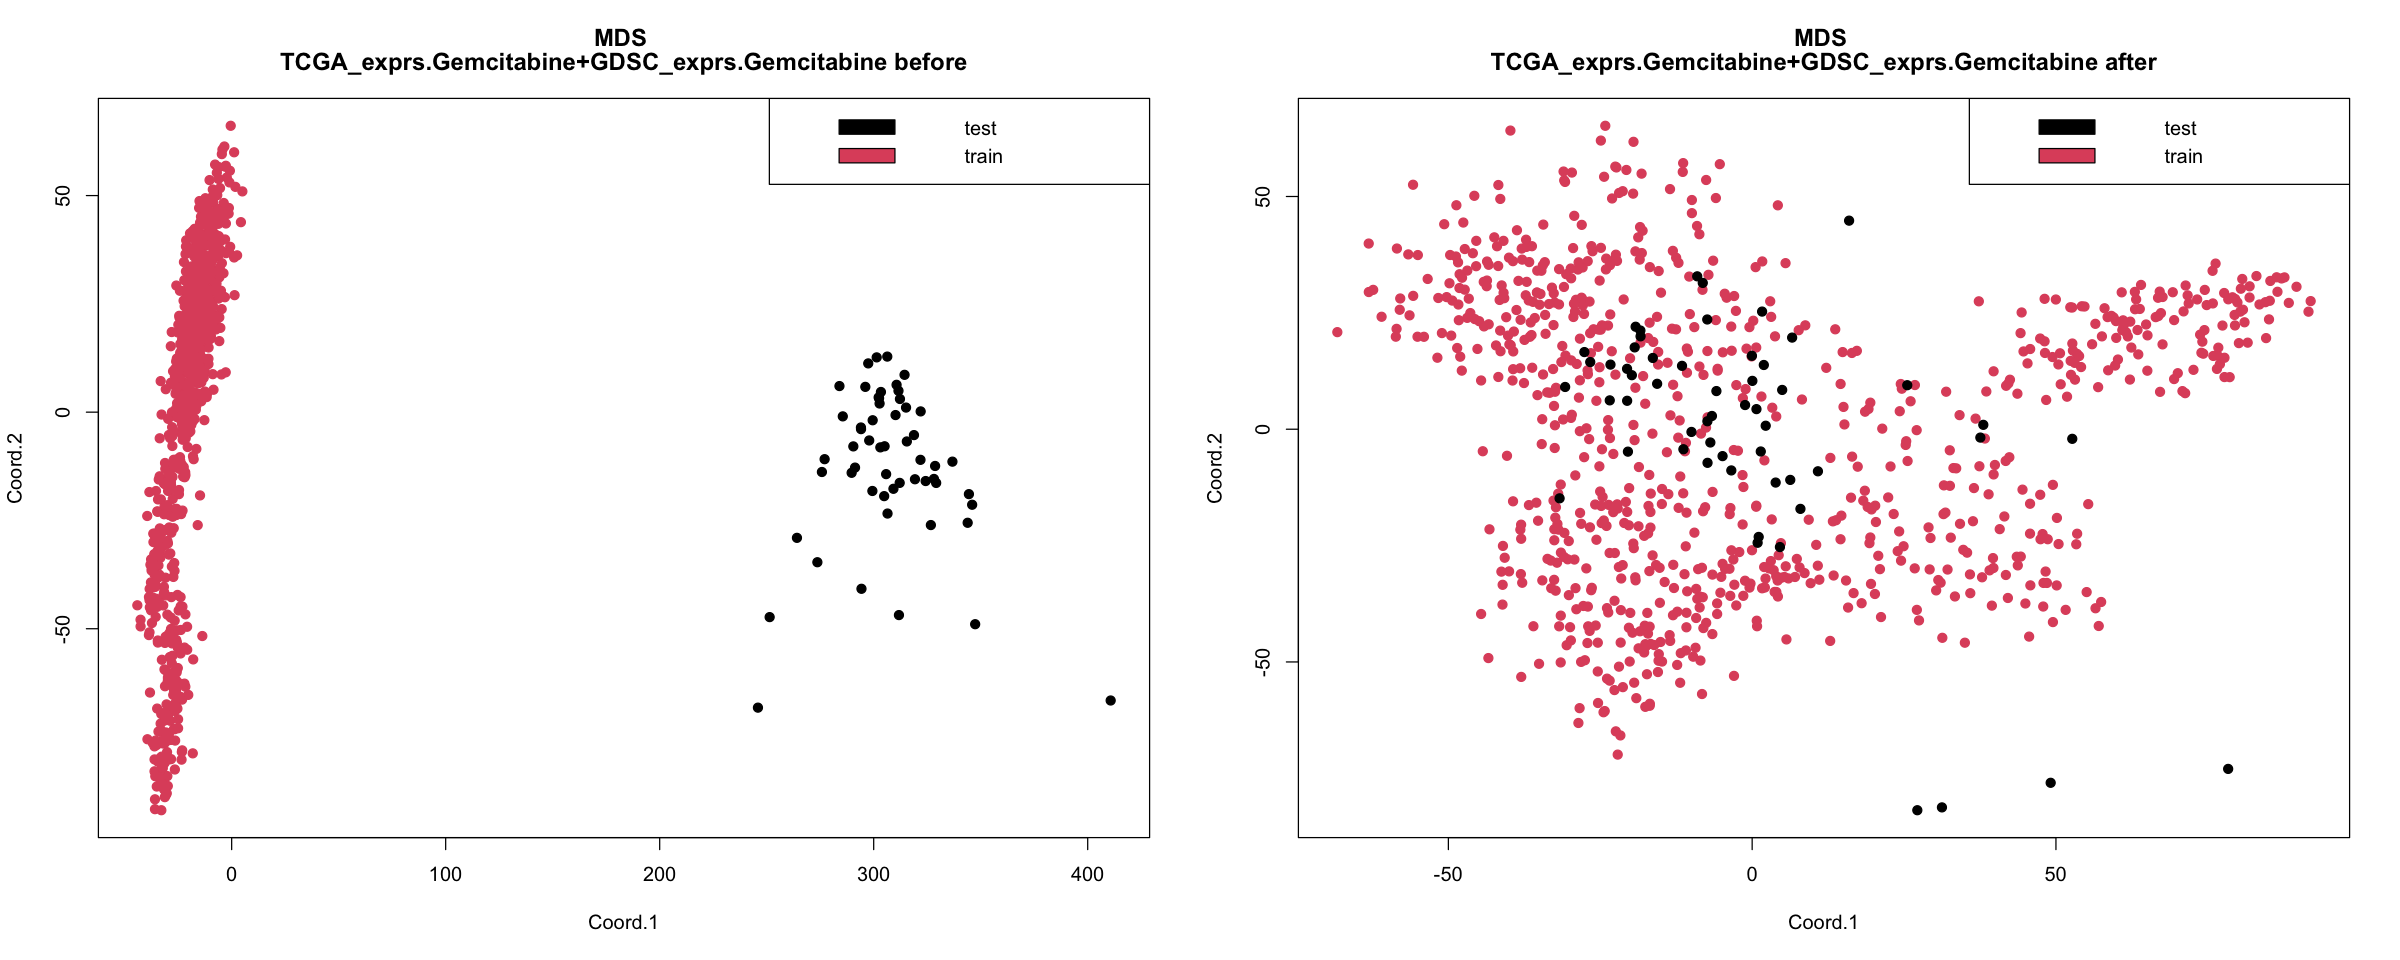

[1] "write results to "                                                                                                                       
[2] "/Volumes/Expansion/Thesis Work/Results/preprocessed_results2/exprs_homogenized/GDSC_exprs.Gemcitabine.eb_with.TCGA_exprs.Gemcitabine.tsv"
[3] "/Volumes/Expansion/Thesis Work/Results/preprocessed_results2/exprs_homogenized/TCGA_exprs.Gemcitabine.eb_with.GDSC_exprs.Gemcitabine.tsv"
[1] "/Volumes/Expansion/Thesis Work/Results/preprocessed_results2/exprs/PDX_exprs.Gemcitabine.tsv" 
[2] "/Volumes/Expansion/Thesis Work/Results/preprocessed_results2/exprs/GDSC_exprs.Gemcitabine.tsv"

 18189  gene identifiers overlap between the supplied expression matrices... 
 Found 765 genes with uniform expression within a single batch (all zeros); these will not be adjusted for batch.


Found2batches

Adjusting for0covariate(s) or covariate level(s)

Standardizing Data across genes

Fitting L/S model and finding priors

Finding parametric adjustments

Adjusting the Data




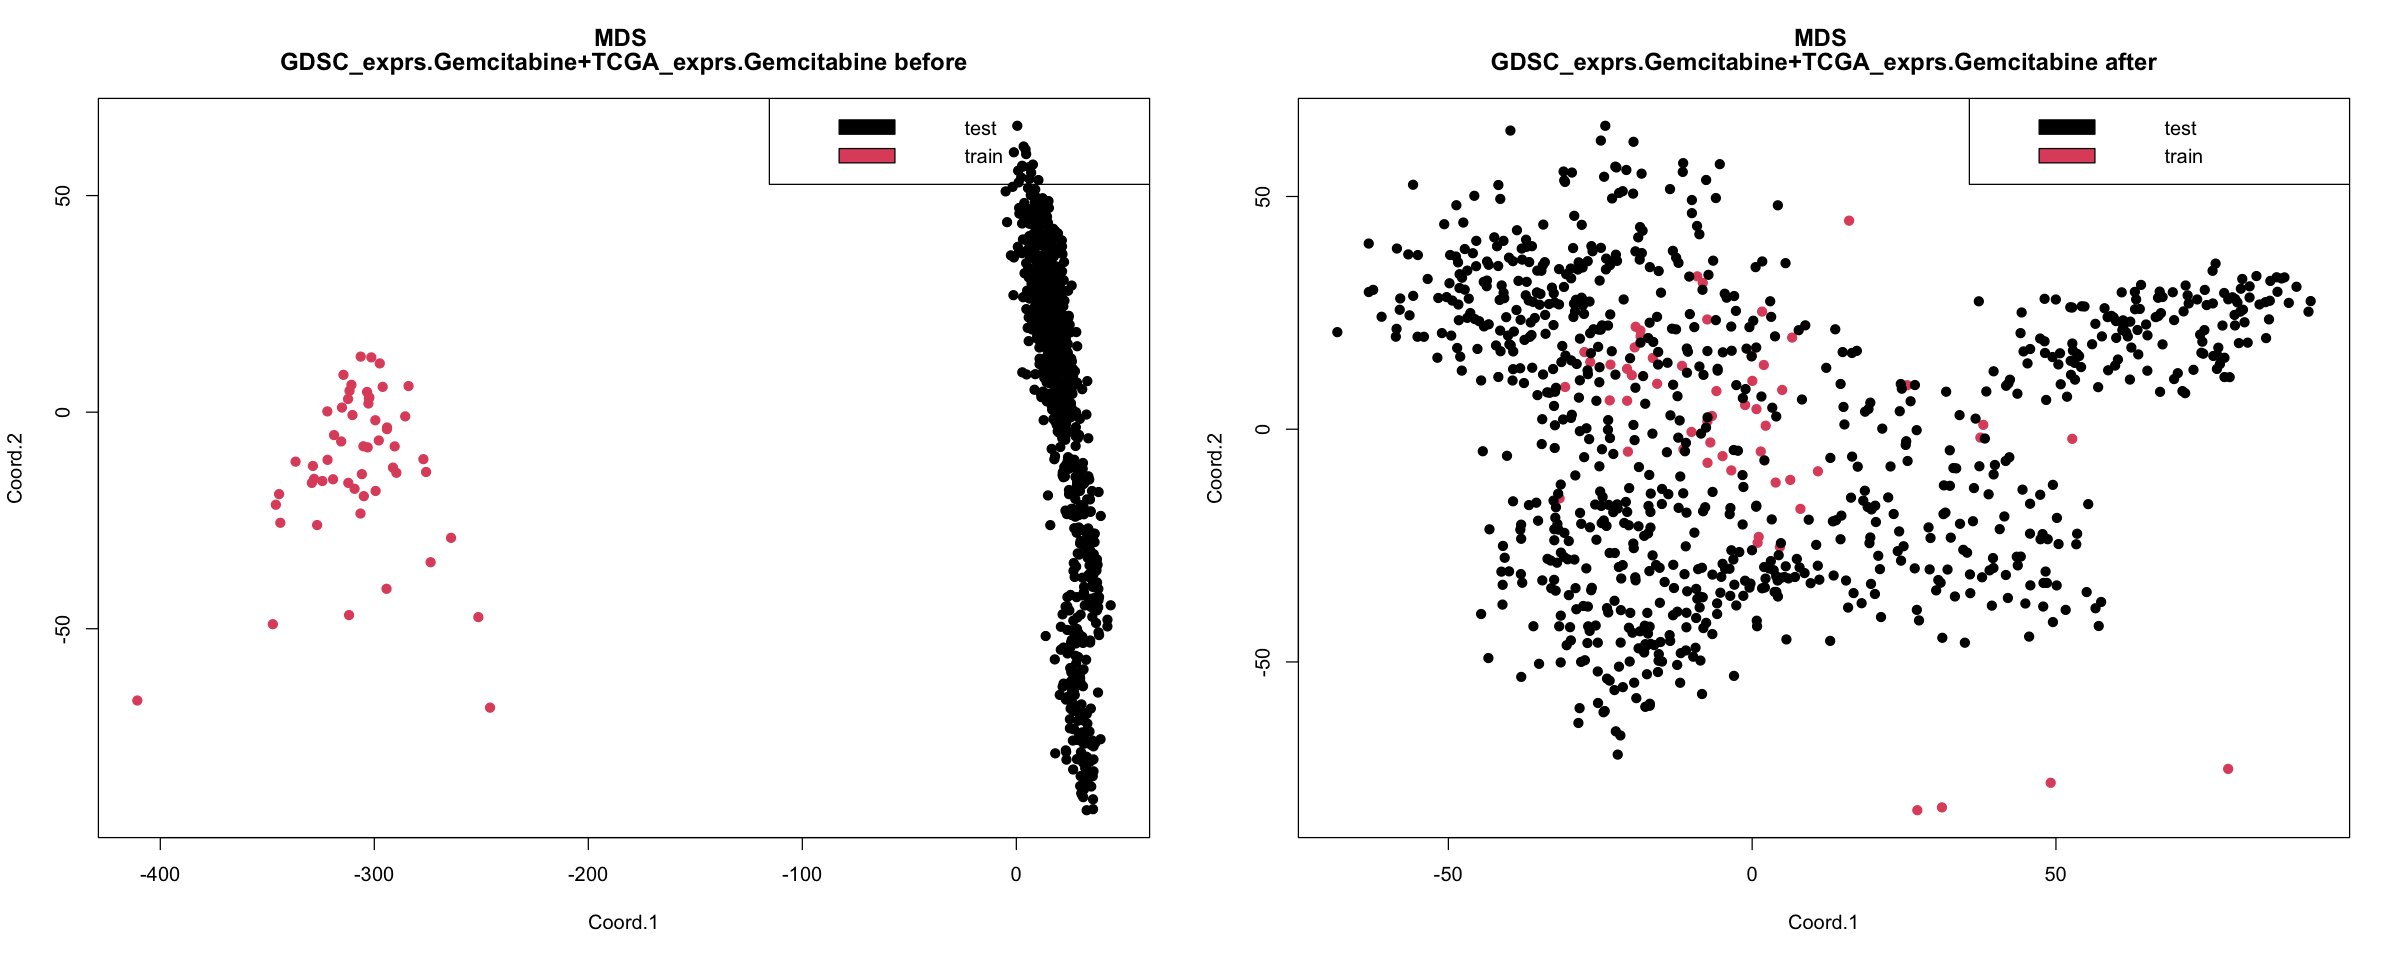

[1] "write results to "                                                                                                                      
[2] "/Volumes/Expansion/Thesis Work/Results/preprocessed_results2/exprs_homogenized/PDX_exprs.Gemcitabine.eb_with.GDSC_exprs.Gemcitabine.tsv"
[3] "/Volumes/Expansion/Thesis Work/Results/preprocessed_results2/exprs_homogenized/GDSC_exprs.Gemcitabine.eb_with.PDX_exprs.Gemcitabine.tsv"
[1] "/Volumes/Expansion/Thesis Work/Results/preprocessed_results2/exprs/GDSC_exprs.Gemcitabine.tsv"
[2] "/Volumes/Expansion/Thesis Work/Results/preprocessed_results2/exprs/PDX_exprs.Gemcitabine.tsv" 

 18189  gene identifiers overlap between the supplied expression matrices... 
 Found 765 genes with uniform expression within a single batch (all zeros); these will not be adjusted for batch.


Found2batches

Adjusting for0covariate(s) or covariate level(s)

Standardizing Data across genes

Fitting L/S model and finding priors

Finding parametric adjustments

Adjusting the Data




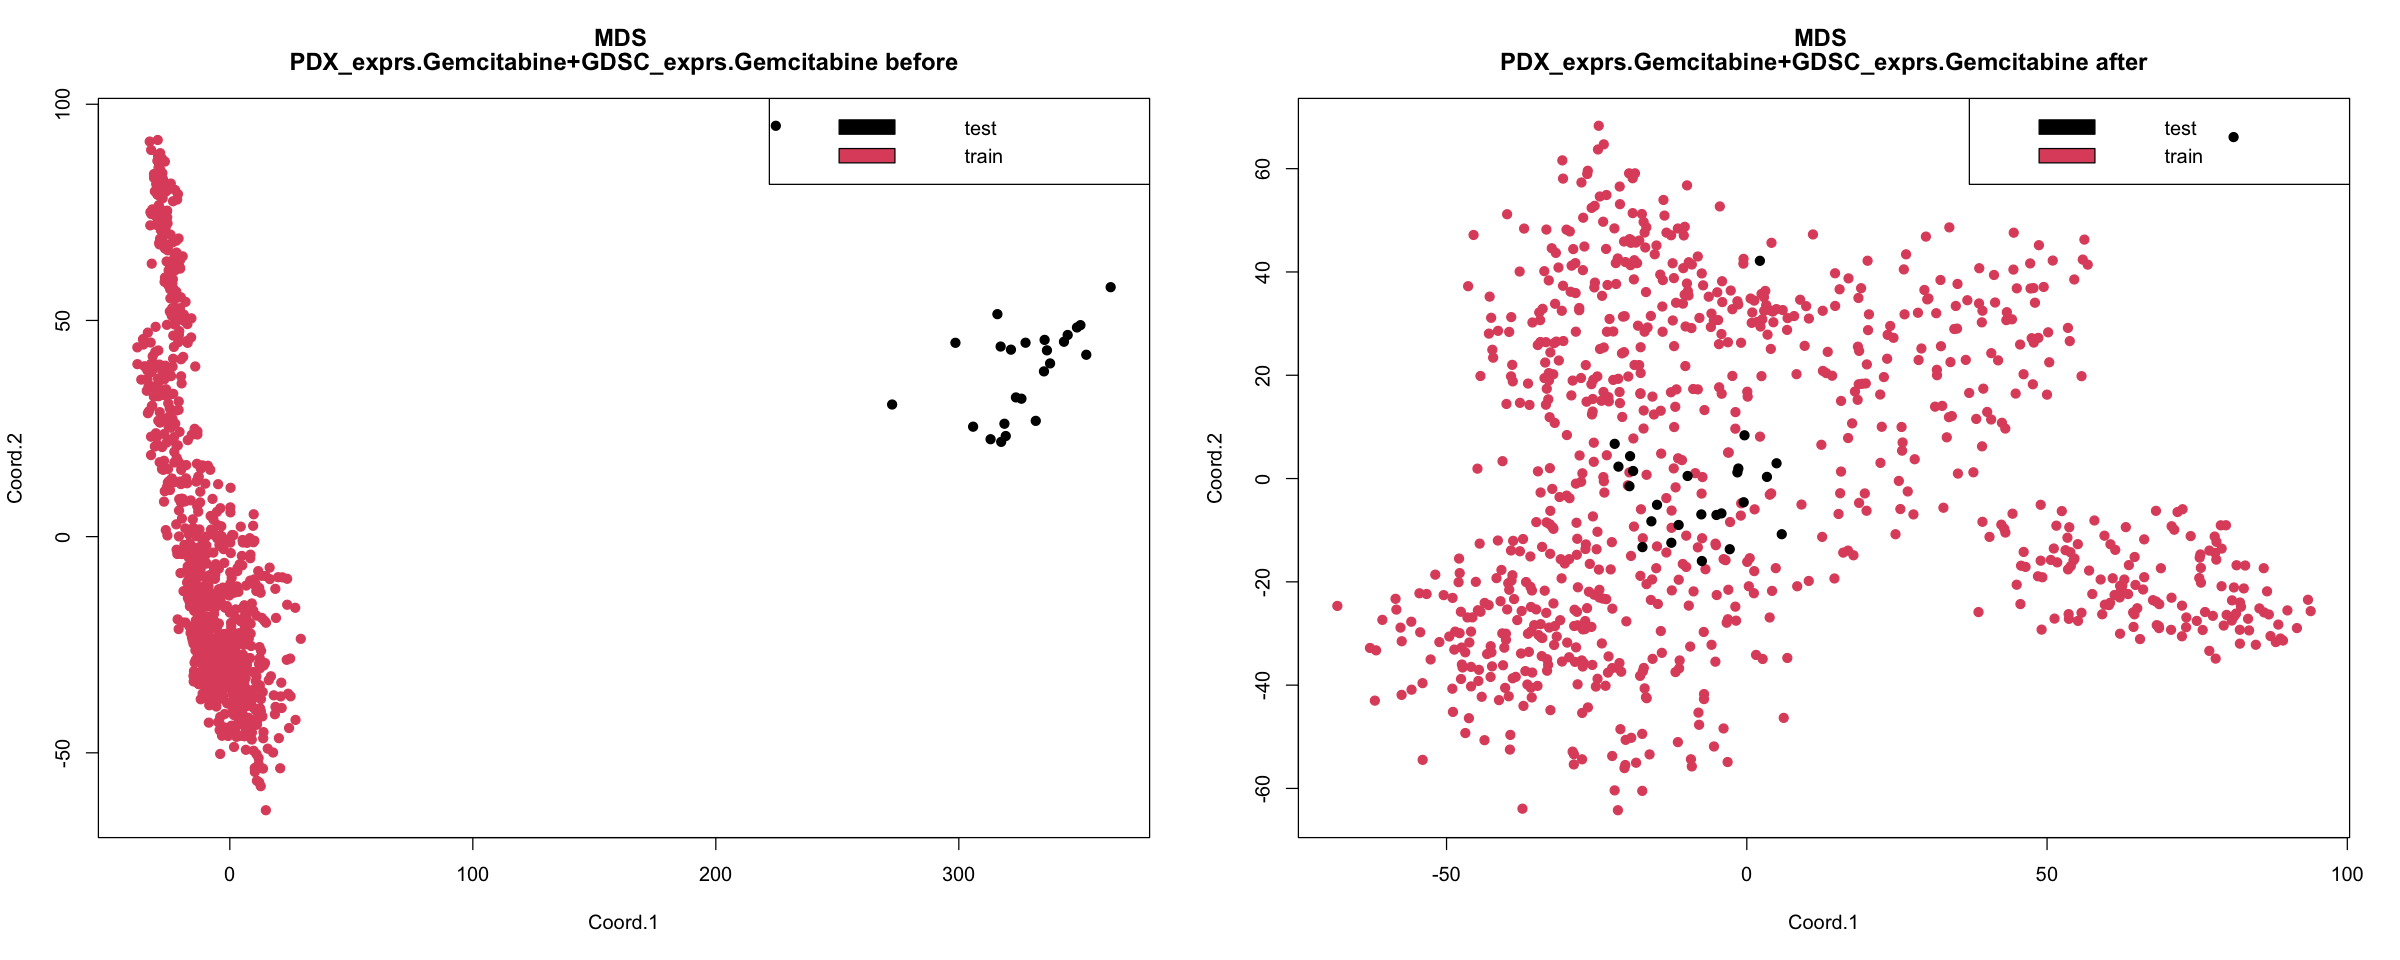

[1] "write results to "                                                                                                                      
[2] "/Volumes/Expansion/Thesis Work/Results/preprocessed_results2/exprs_homogenized/GDSC_exprs.Gemcitabine.eb_with.PDX_exprs.Gemcitabine.tsv"
[3] "/Volumes/Expansion/Thesis Work/Results/preprocessed_results2/exprs_homogenized/PDX_exprs.Gemcitabine.eb_with.GDSC_exprs.Gemcitabine.tsv"
[1] "/Volumes/Expansion/Thesis Work/Results/preprocessed_results2/exprs/TCGA_exprs.Cisplatin.tsv"
[2] "/Volumes/Expansion/Thesis Work/Results/preprocessed_results2/exprs/GDSC_exprs.Cisplatin.tsv"

 18197  gene identifiers overlap between the supplied expression matrices... 
 Found 97 genes with uniform expression within a single batch (all zeros); these will not be adjusted for batch.


Found2batches

Adjusting for0covariate(s) or covariate level(s)

Standardizing Data across genes

Fitting L/S model and finding priors

Finding parametric adjustments

Adjusting the Data




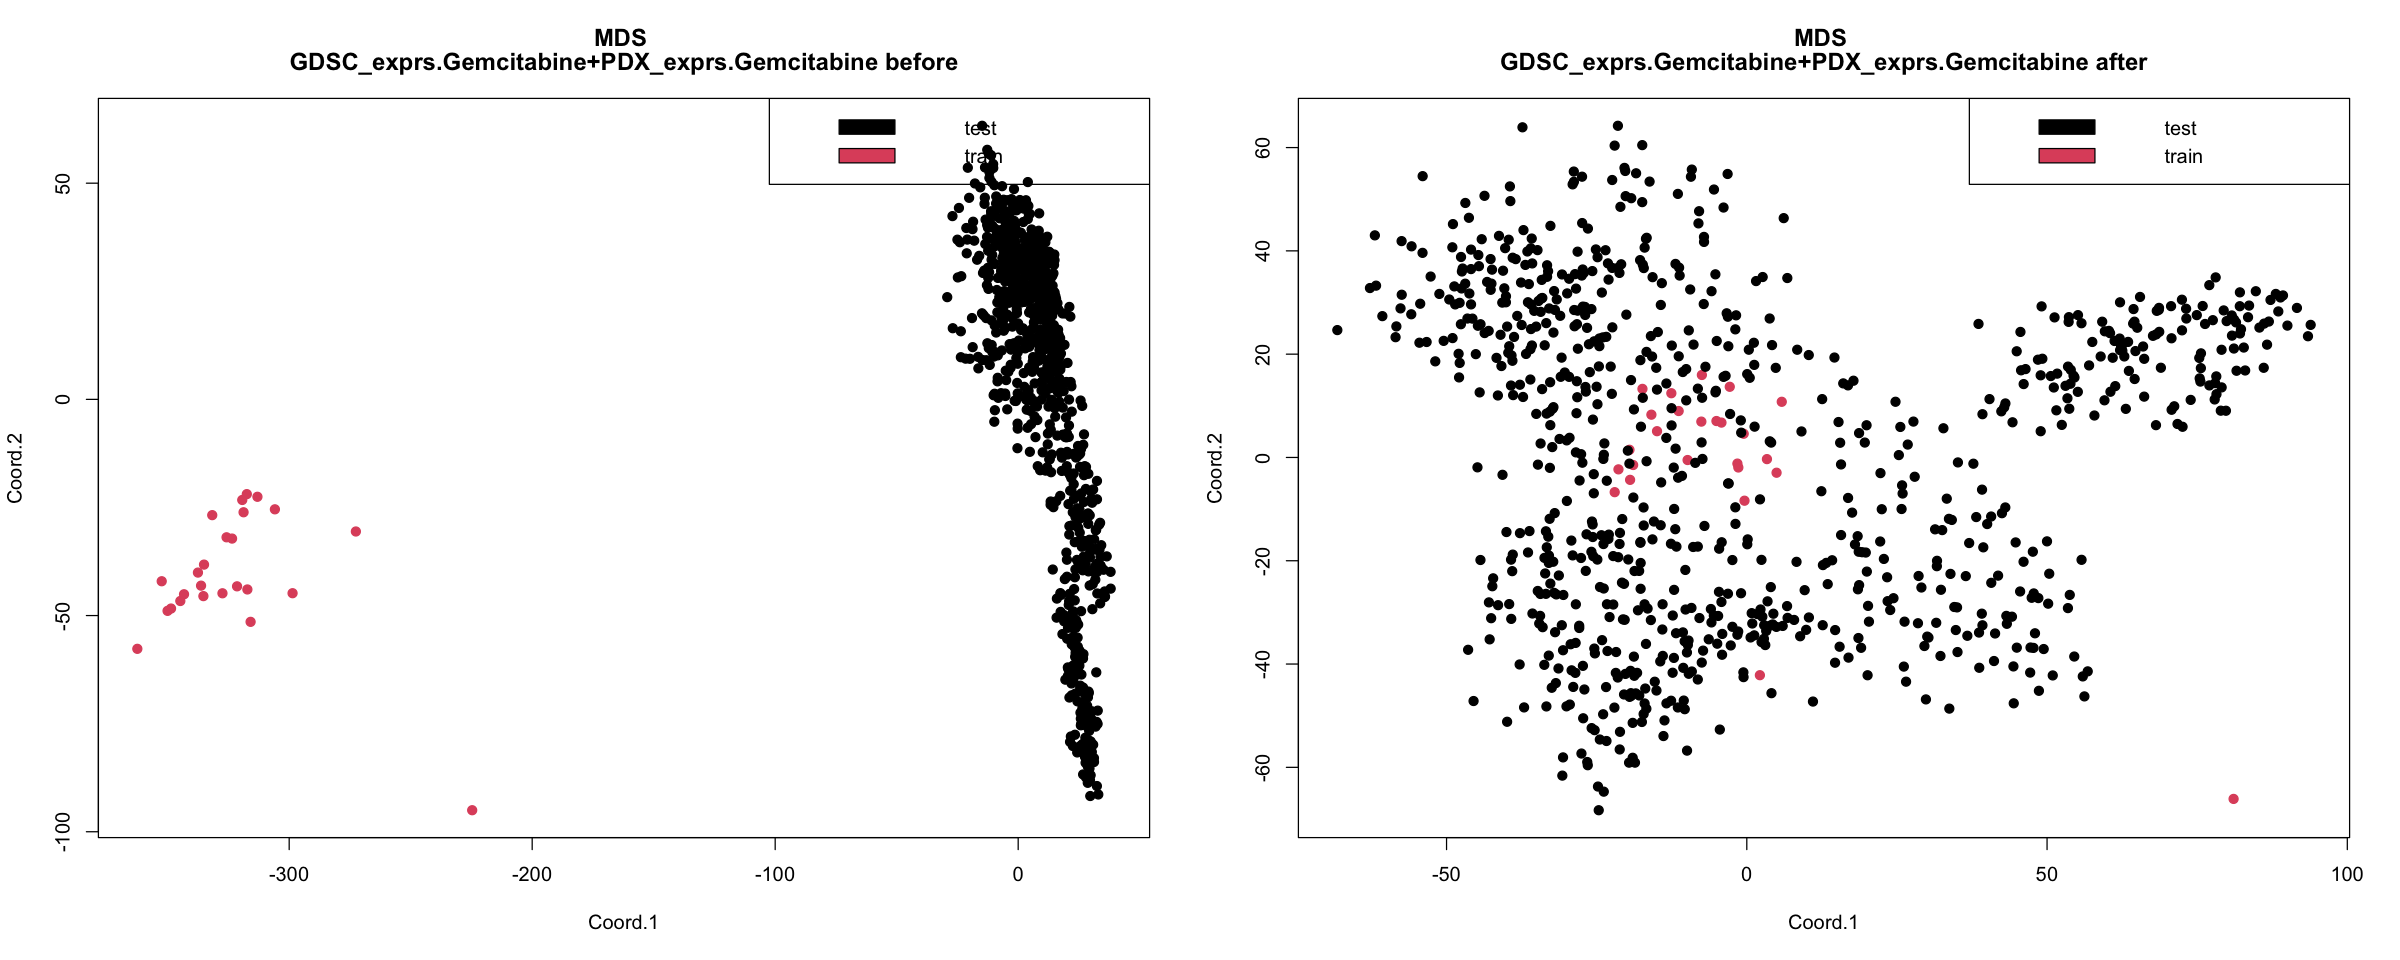

[1] "write results to "                                                                                                                   
[2] "/Volumes/Expansion/Thesis Work/Results/preprocessed_results2/exprs_homogenized/TCGA_exprs.Cisplatin.eb_with.GDSC_exprs.Cisplatin.tsv"
[3] "/Volumes/Expansion/Thesis Work/Results/preprocessed_results2/exprs_homogenized/GDSC_exprs.Cisplatin.eb_with.TCGA_exprs.Cisplatin.tsv"
[1] "/Volumes/Expansion/Thesis Work/Results/preprocessed_results2/exprs/GDSC_exprs.Cisplatin.tsv"
[2] "/Volumes/Expansion/Thesis Work/Results/preprocessed_results2/exprs/TCGA_exprs.Cisplatin.tsv"

 18197  gene identifiers overlap between the supplied expression matrices... 
 Found 97 genes with uniform expression within a single batch (all zeros); these will not be adjusted for batch.


Found2batches

Adjusting for0covariate(s) or covariate level(s)

Standardizing Data across genes

Fitting L/S model and finding priors

Finding parametric adjustments

Adjusting the Data




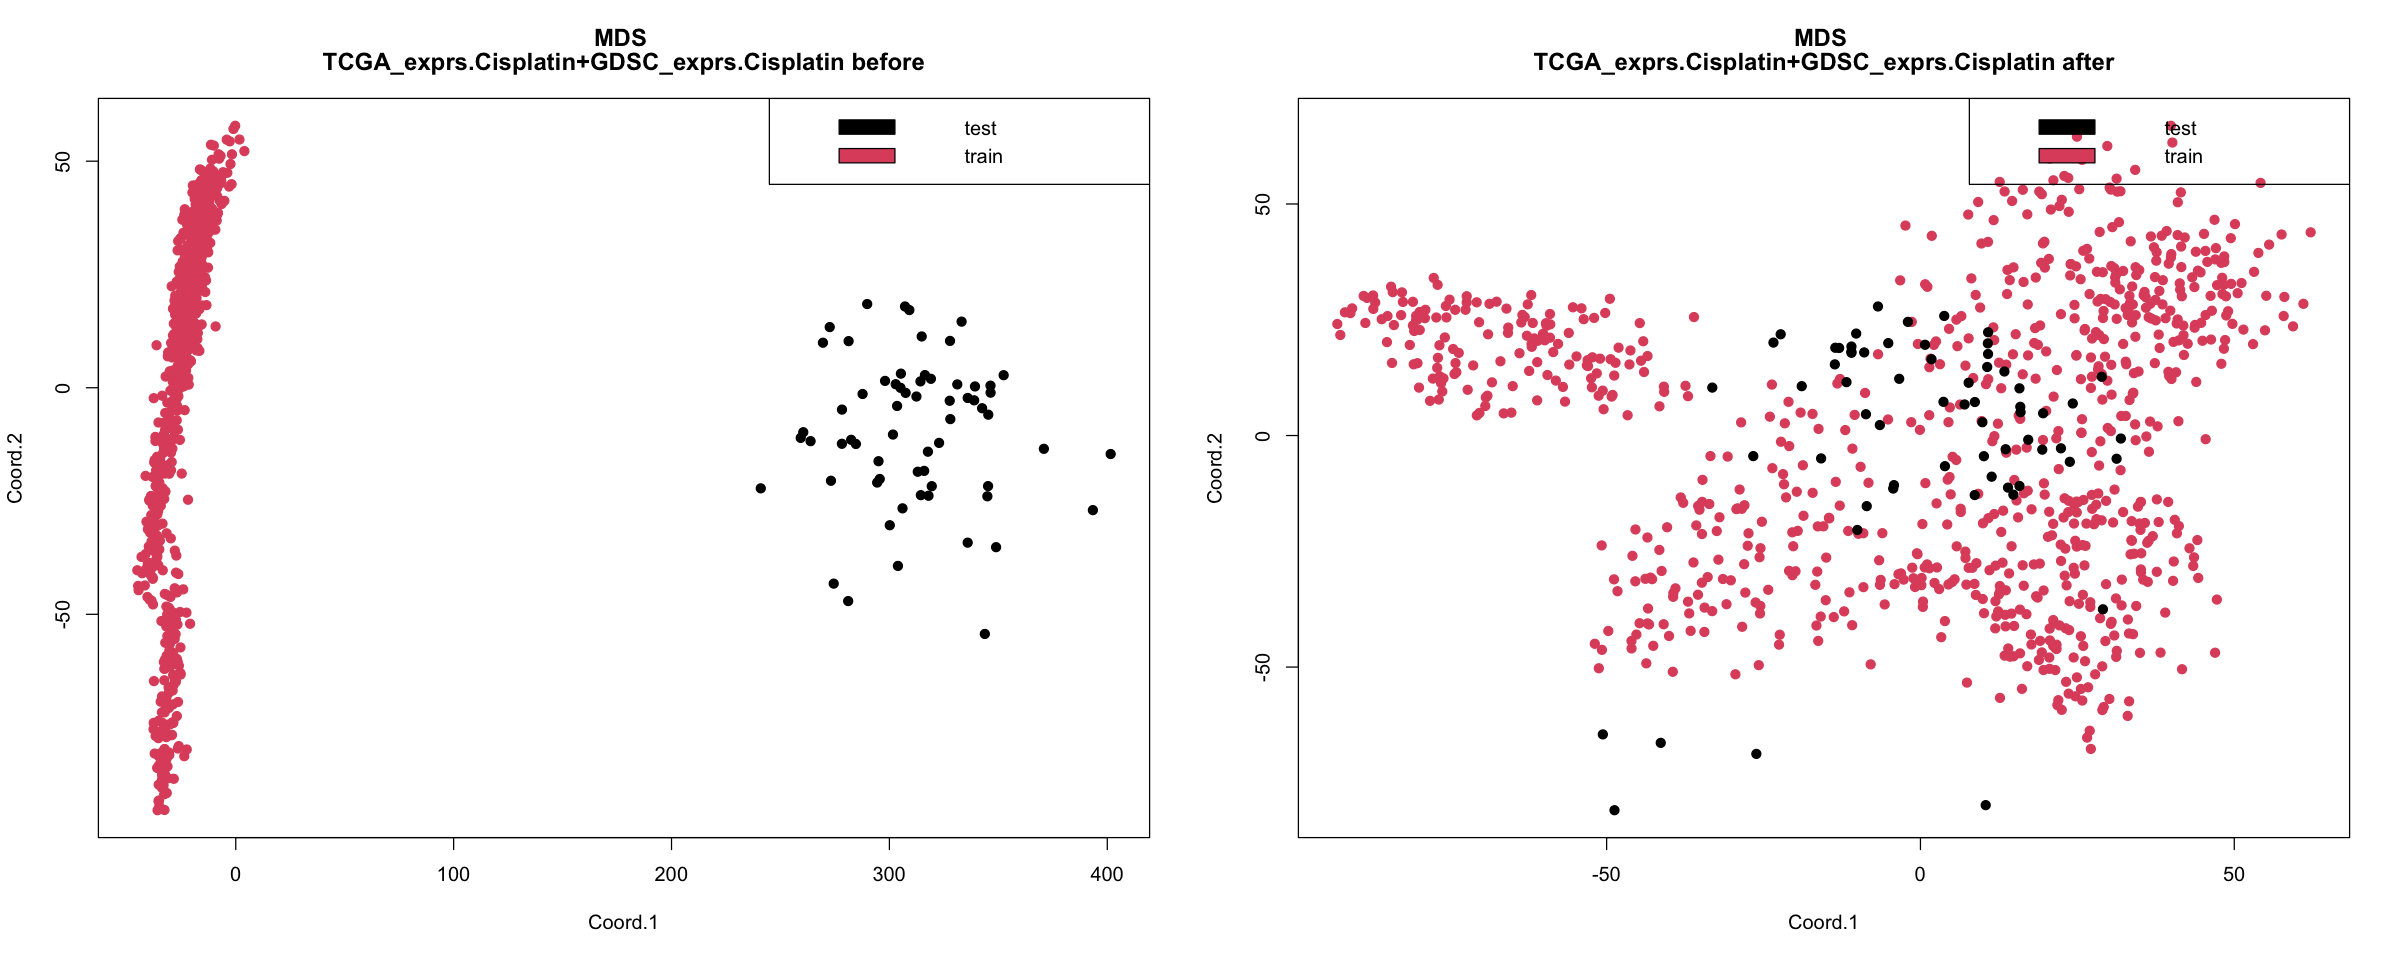

[1] "write results to "                                                                                                                   
[2] "/Volumes/Expansion/Thesis Work/Results/preprocessed_results2/exprs_homogenized/GDSC_exprs.Cisplatin.eb_with.TCGA_exprs.Cisplatin.tsv"
[3] "/Volumes/Expansion/Thesis Work/Results/preprocessed_results2/exprs_homogenized/TCGA_exprs.Cisplatin.eb_with.GDSC_exprs.Cisplatin.tsv"
[1] "/Volumes/Expansion/Thesis Work/Results/preprocessed_results2/exprs/GDSC_exprs.Temozolomide.tsv"
[2] "/Volumes/Expansion/Thesis Work/Results/preprocessed_results2/exprs/TCGA_exprs.Temozolomide.tsv"

 18197  gene identifiers overlap between the supplied expression matrices... 
 Found 145 genes with uniform expression within a single batch (all zeros); these will not be adjusted for batch.


Found2batches

Adjusting for0covariate(s) or covariate level(s)

Standardizing Data across genes

Fitting L/S model and finding priors

Finding parametric adjustments

Adjusting the Data




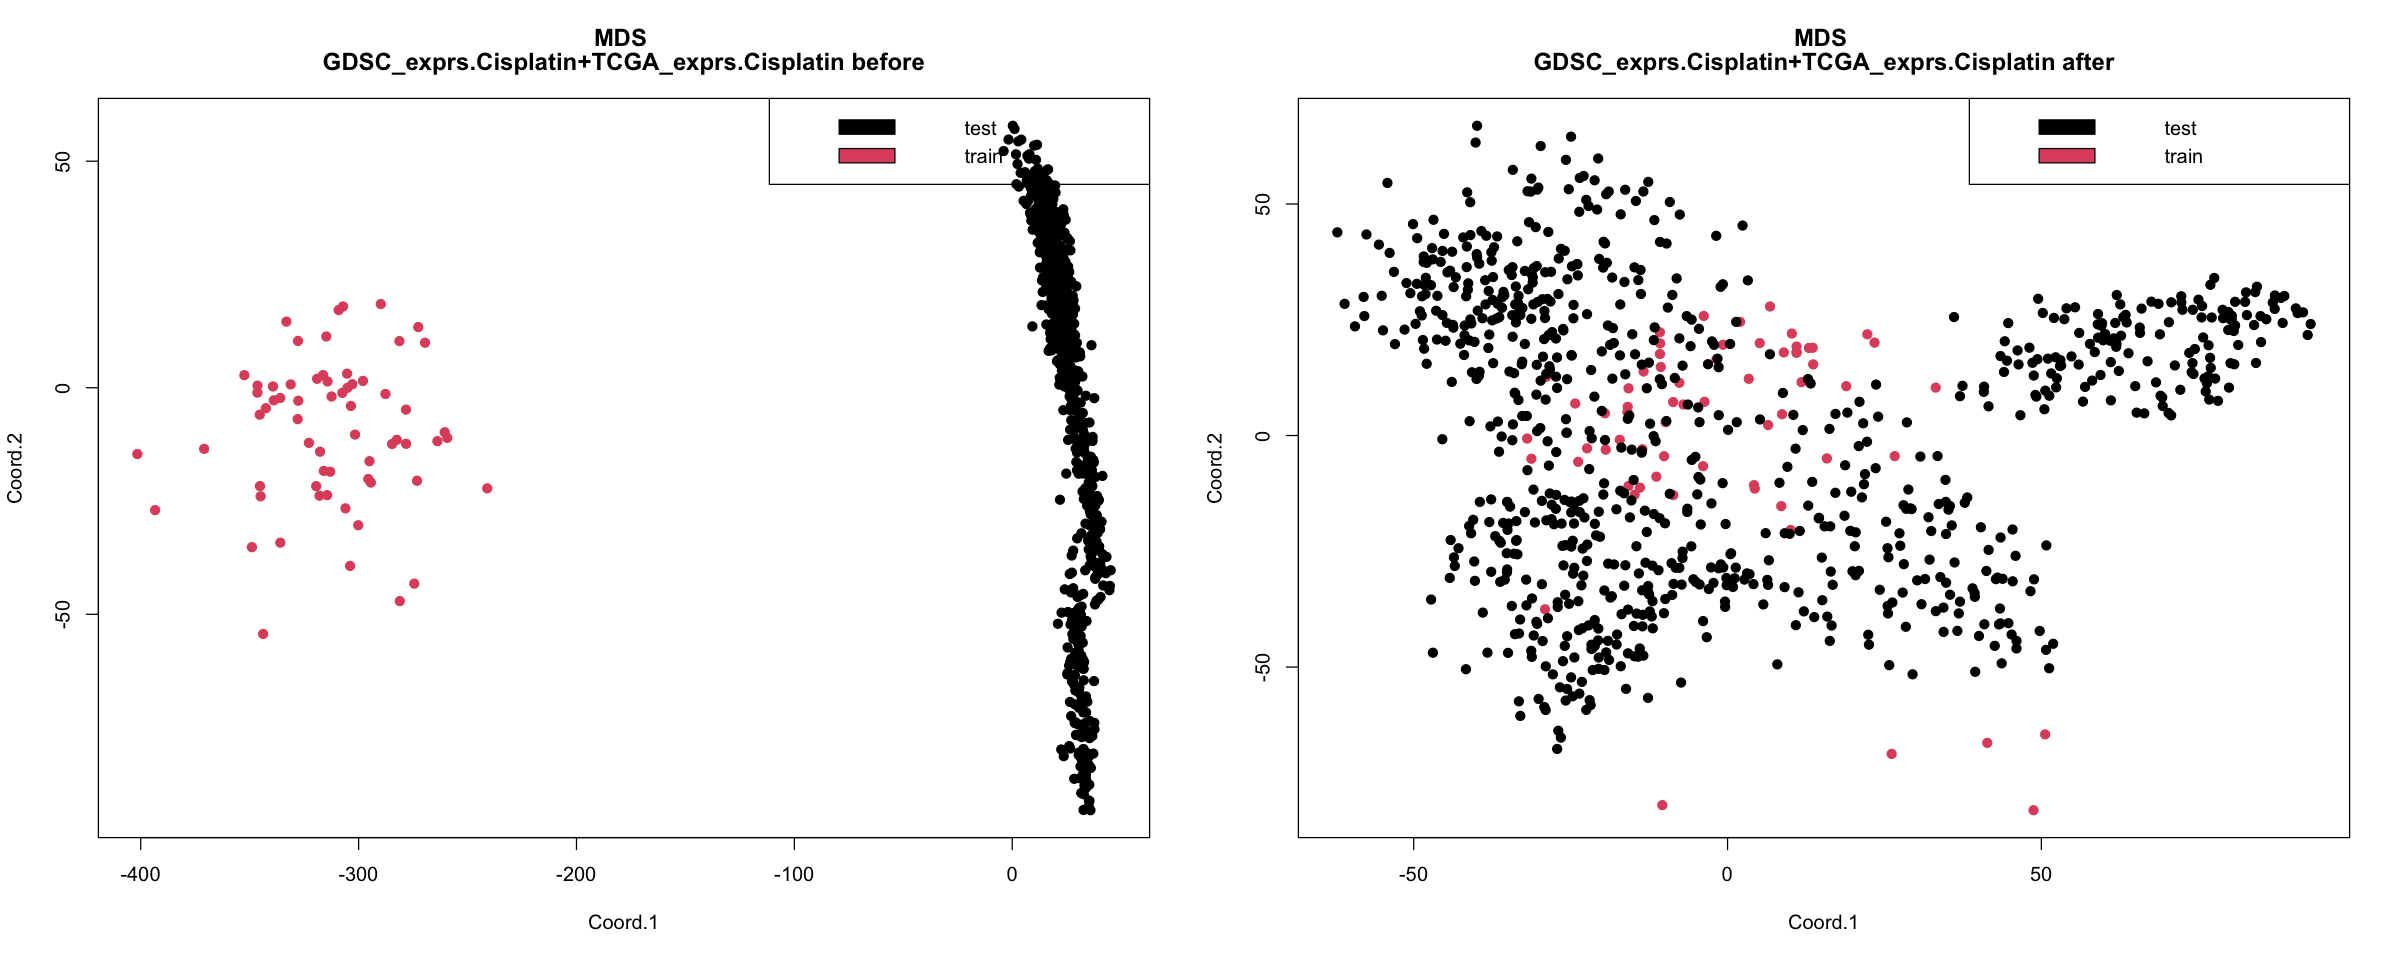

[1] "write results to "                                                                                                                         
[2] "/Volumes/Expansion/Thesis Work/Results/preprocessed_results2/exprs_homogenized/GDSC_exprs.Temozolomide.eb_with.TCGA_exprs.Temozolomide.tsv"
[3] "/Volumes/Expansion/Thesis Work/Results/preprocessed_results2/exprs_homogenized/TCGA_exprs.Temozolomide.eb_with.GDSC_exprs.Temozolomide.tsv"
[1] "/Volumes/Expansion/Thesis Work/Results/preprocessed_results2/exprs/TCGA_exprs.Temozolomide.tsv"
[2] "/Volumes/Expansion/Thesis Work/Results/preprocessed_results2/exprs/GDSC_exprs.Temozolomide.tsv"

 18197  gene identifiers overlap between the supplied expression matrices... 
 Found 145 genes with uniform expression within a single batch (all zeros); these will not be adjusted for batch.


Found2batches

Adjusting for0covariate(s) or covariate level(s)

Standardizing Data across genes

Fitting L/S model and finding priors

Finding parametric adjustments

Adjusting the Data




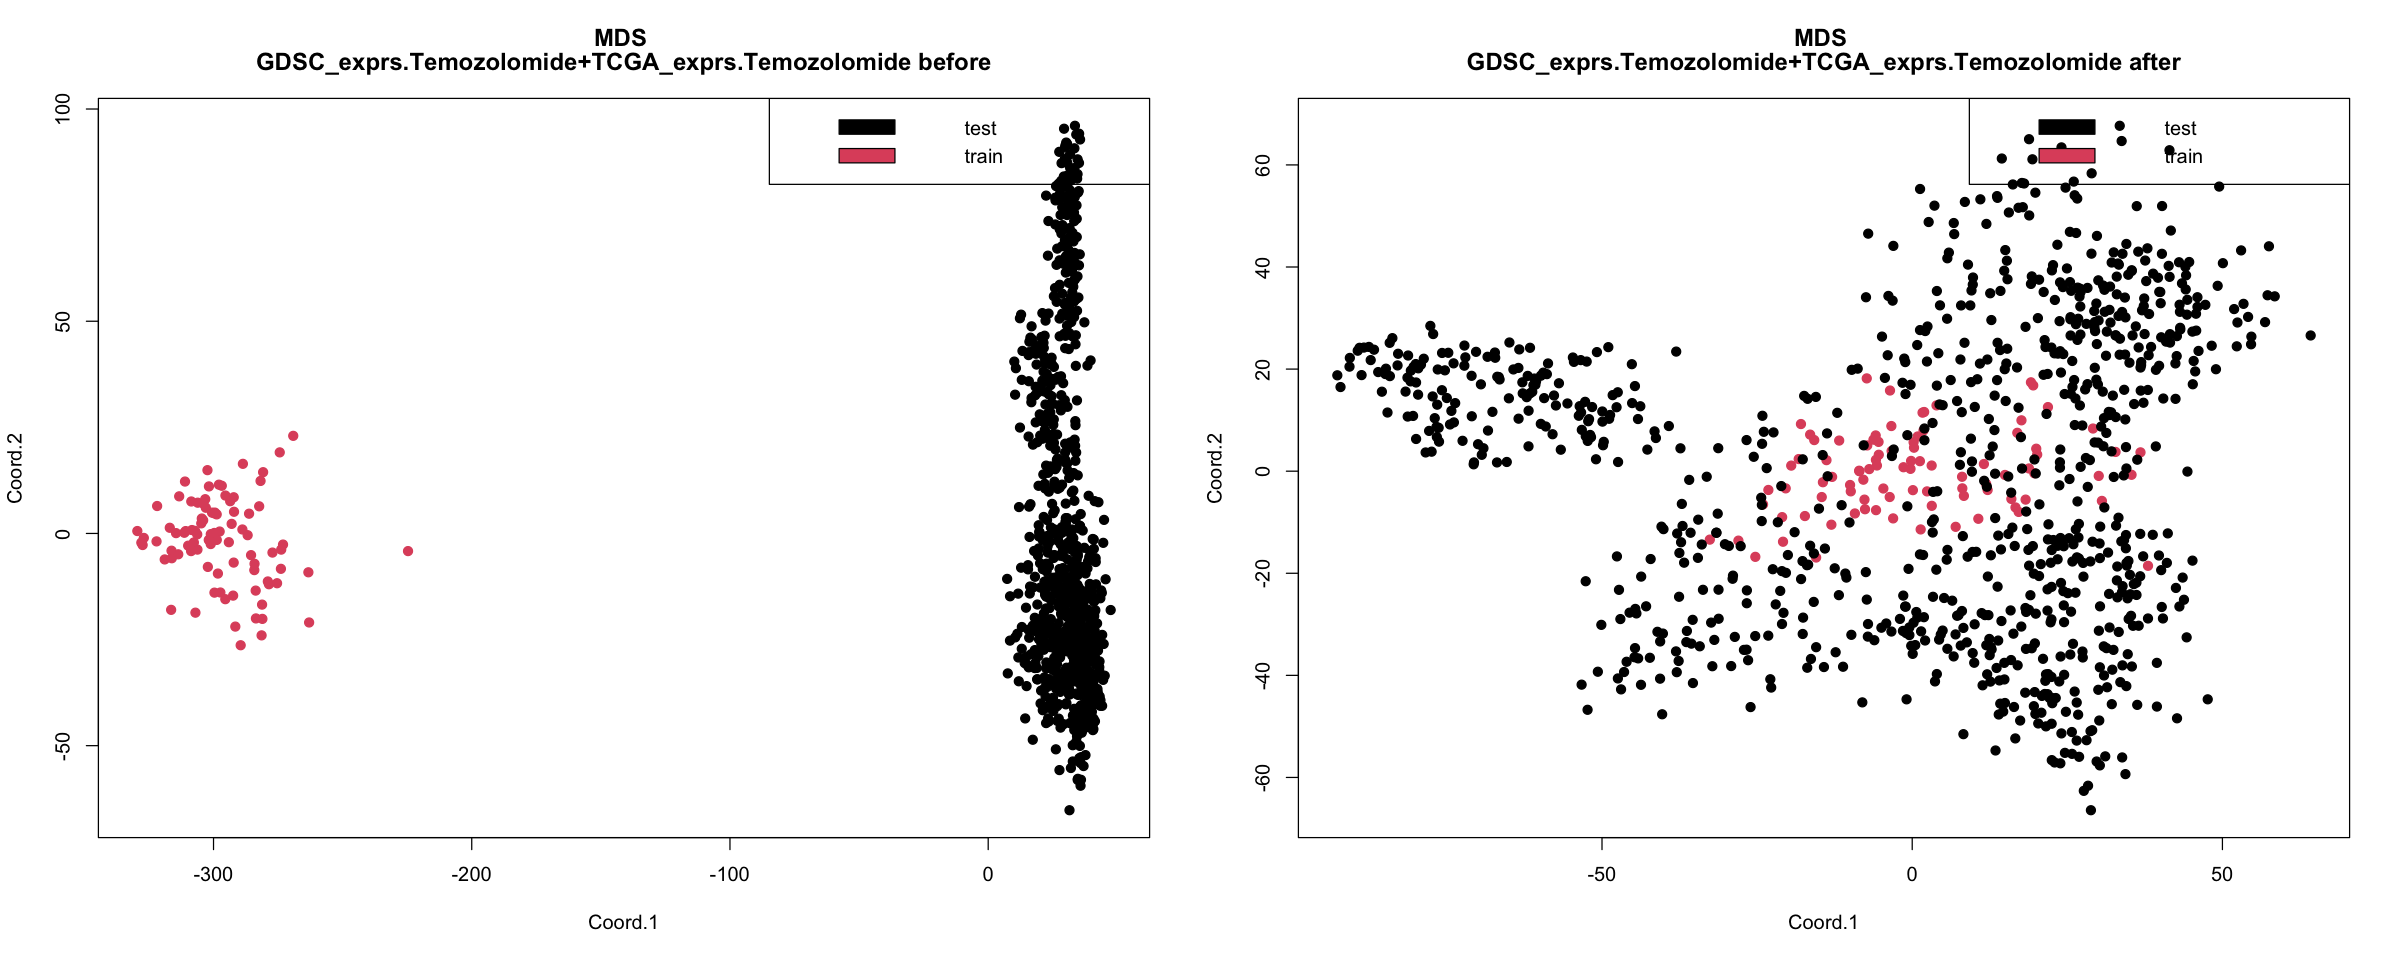

[1] "write results to "                                                                                                                         
[2] "/Volumes/Expansion/Thesis Work/Results/preprocessed_results2/exprs_homogenized/TCGA_exprs.Temozolomide.eb_with.GDSC_exprs.Temozolomide.tsv"
[3] "/Volumes/Expansion/Thesis Work/Results/preprocessed_results2/exprs_homogenized/GDSC_exprs.Temozolomide.eb_with.TCGA_exprs.Temozolomide.tsv"
[1] "/Volumes/Expansion/Thesis Work/Results/preprocessed_results2/exprs/TCGA_exprs.Fluorouracil.tsv"  
[2] "/Volumes/Expansion/Thesis Work/Results/preprocessed_results2/exprs/GDSC_exprs.5-Fluorouracil.tsv"

 18197  gene identifiers overlap between the supplied expression matrices... 
 Found 95 genes with uniform expression within a single batch (all zeros); these will not be adjusted for batch.


Found2batches

Adjusting for0covariate(s) or covariate level(s)

Standardizing Data across genes

Fitting L/S model and finding priors

Finding parametric adjustments

Adjusting the Data




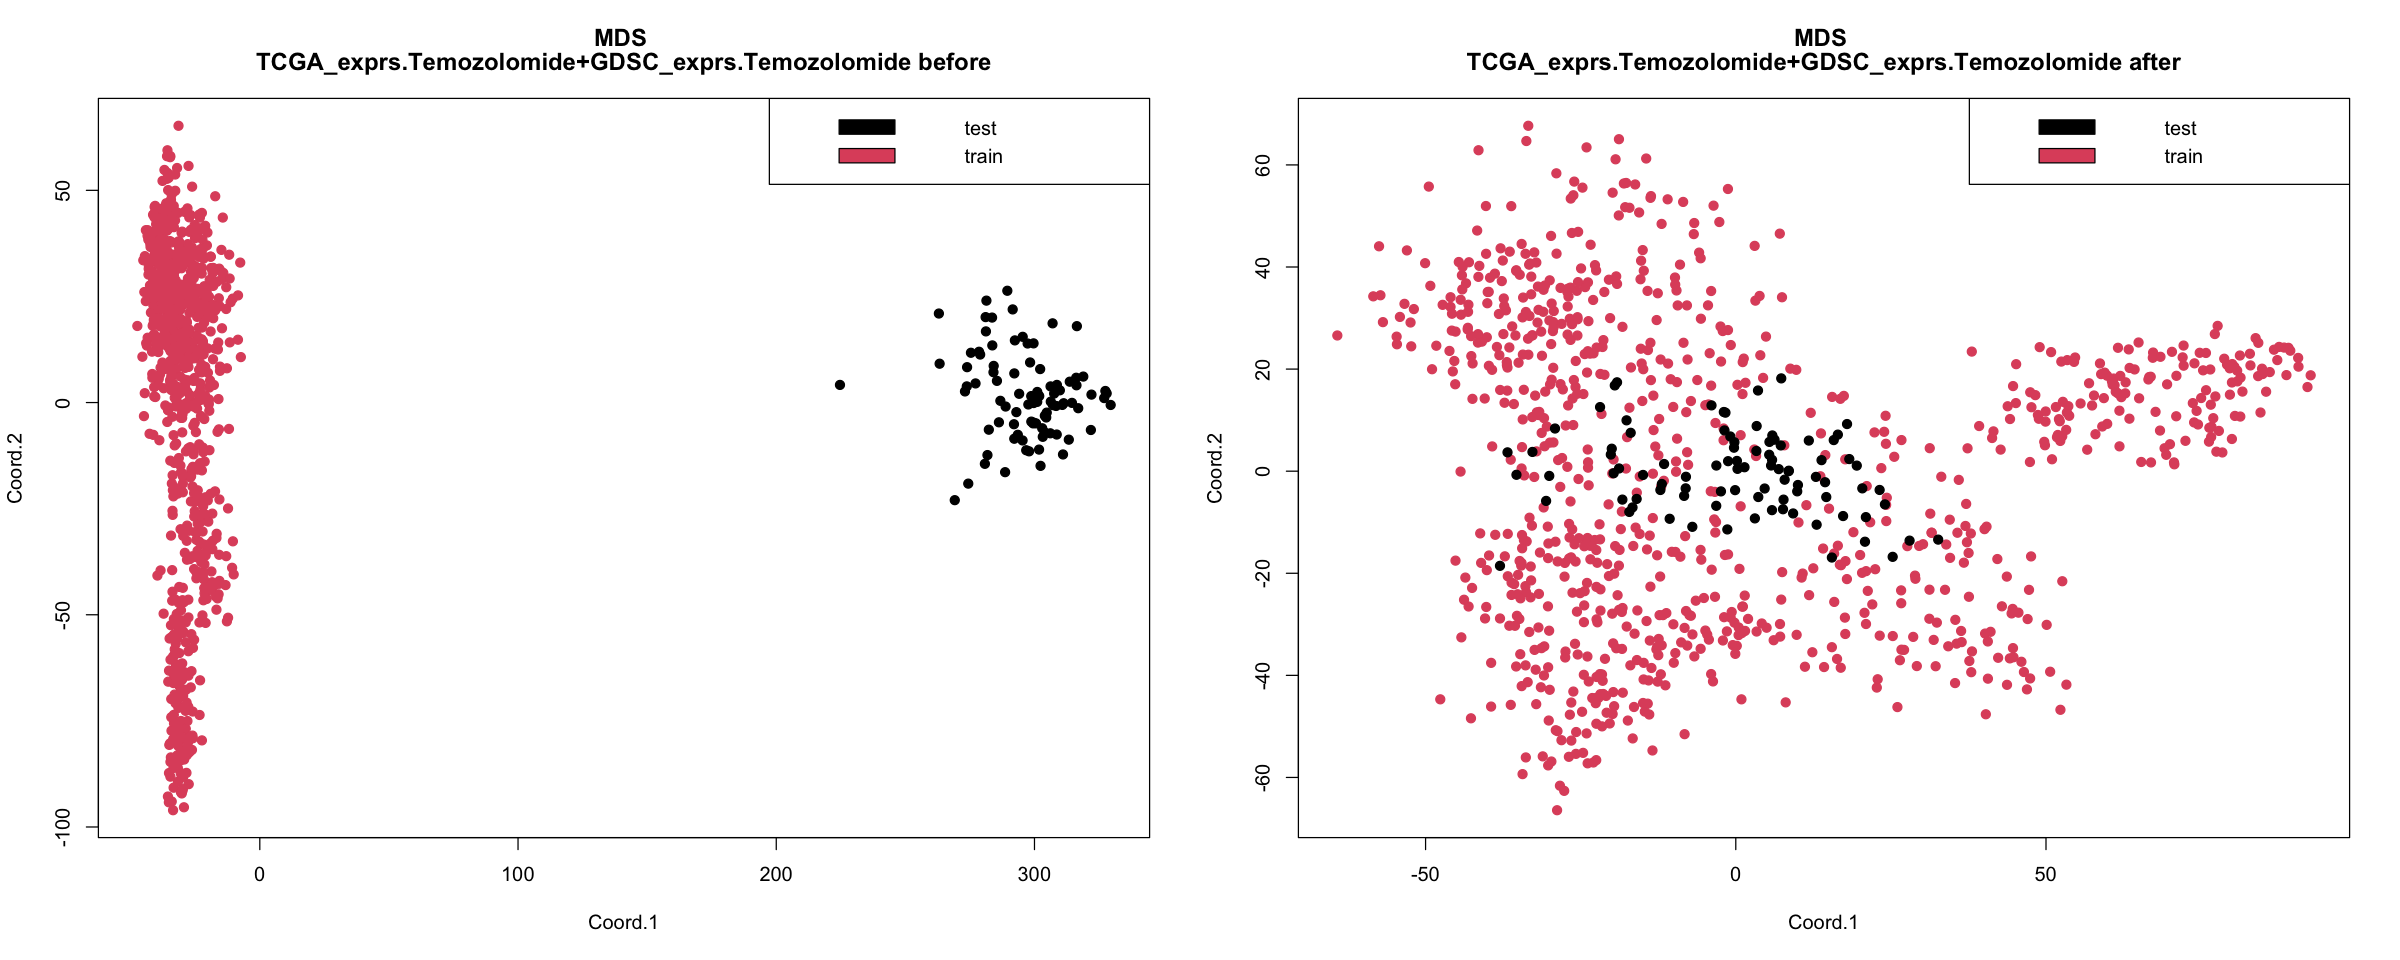

[1] "write results to "                                                                                                                           
[2] "/Volumes/Expansion/Thesis Work/Results/preprocessed_results2/exprs_homogenized/TCGA_exprs.Fluorouracil.eb_with.GDSC_exprs.5-Fluorouracil.tsv"
[3] "/Volumes/Expansion/Thesis Work/Results/preprocessed_results2/exprs_homogenized/GDSC_exprs.5-Fluorouracil.eb_with.TCGA_exprs.Fluorouracil.tsv"
[1] "/Volumes/Expansion/Thesis Work/Results/preprocessed_results2/exprs/GDSC_exprs.5-Fluorouracil.tsv"
[2] "/Volumes/Expansion/Thesis Work/Results/preprocessed_results2/exprs/TCGA_exprs.Fluorouracil.tsv"  

 18197  gene identifiers overlap between the supplied expression matrices... 
 Found 95 genes with uniform expression within a single batch (all zeros); these will not be adjusted for batch.


Found2batches

Adjusting for0covariate(s) or covariate level(s)

Standardizing Data across genes

Fitting L/S model and finding priors

Finding parametric adjustments

Adjusting the Data




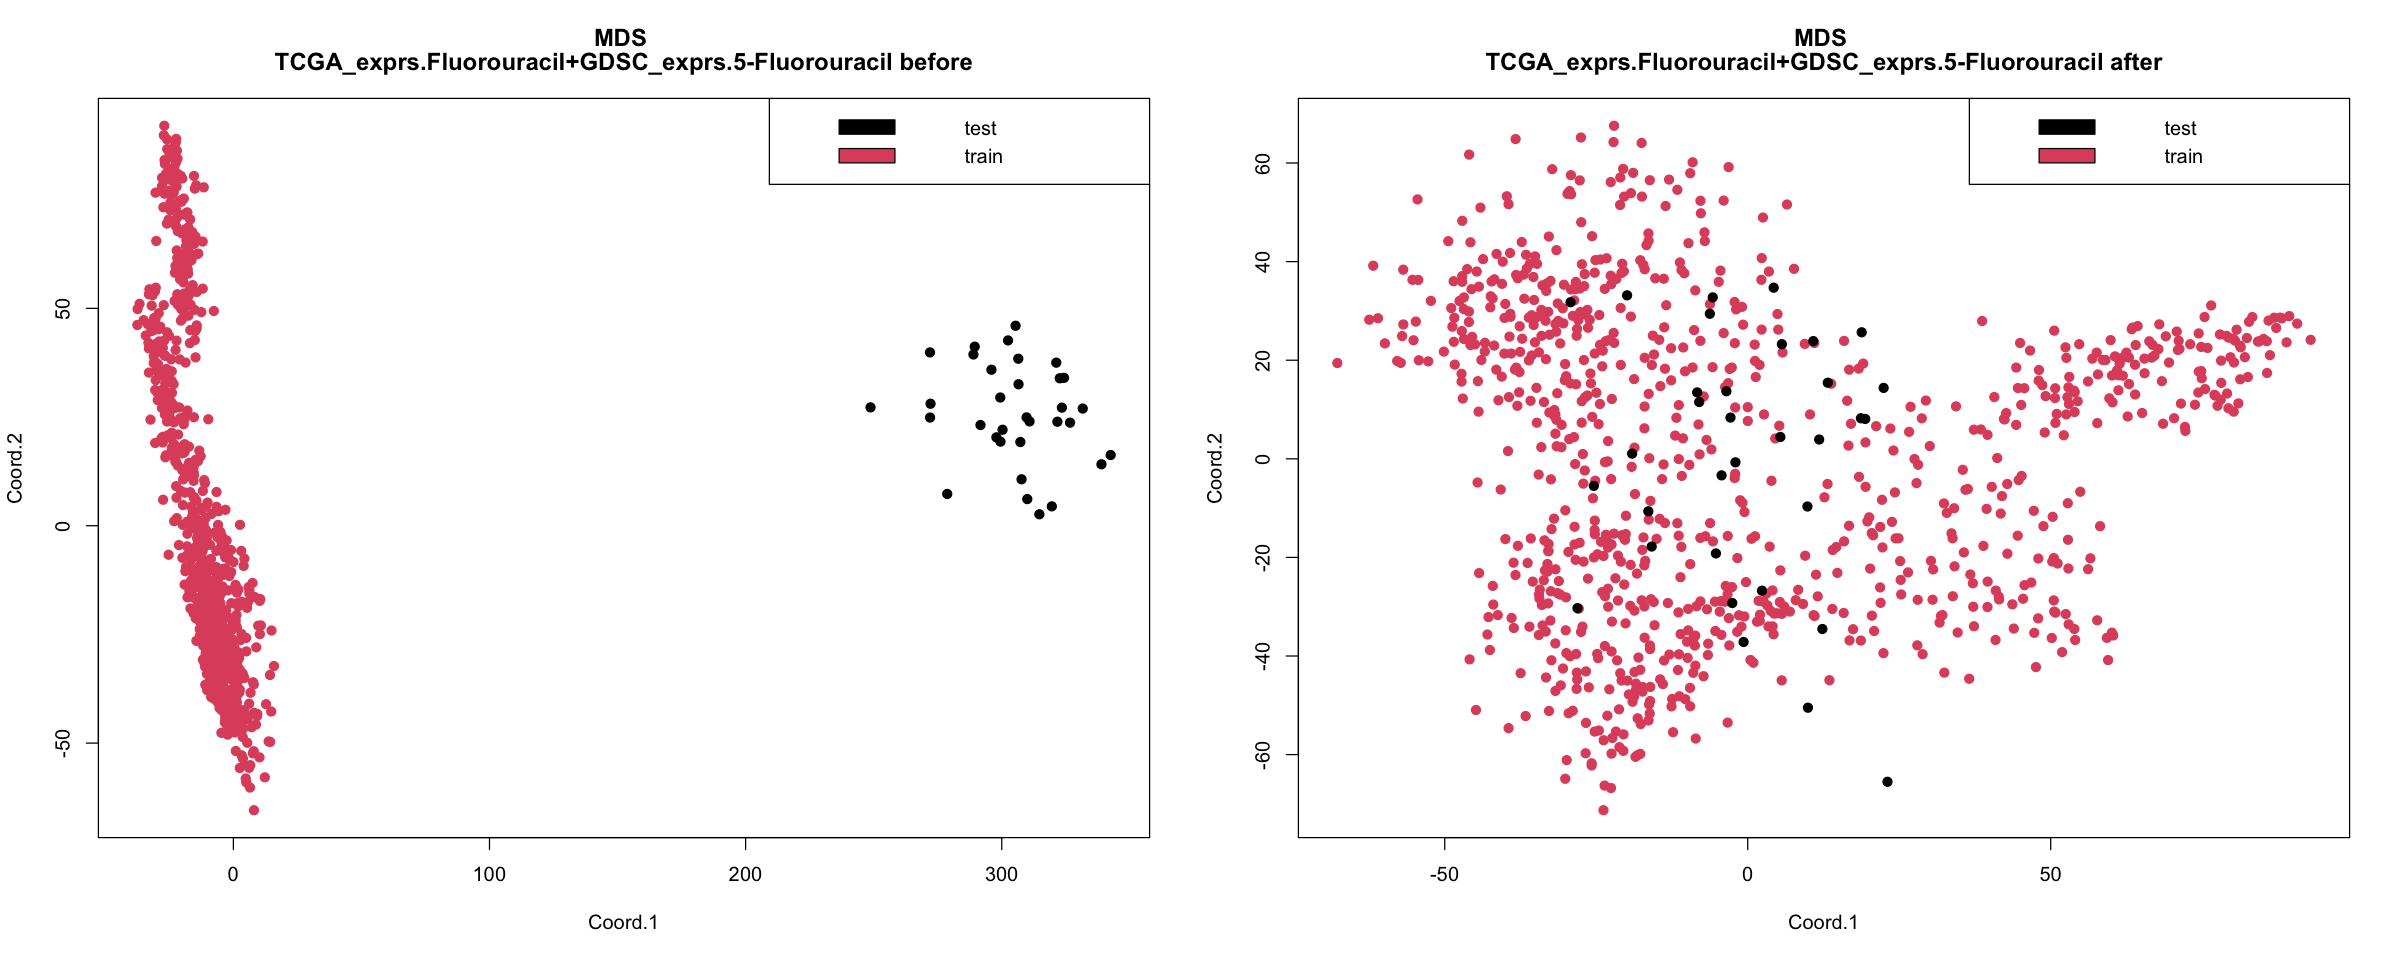

[1] "write results to "                                                                                                                           
[2] "/Volumes/Expansion/Thesis Work/Results/preprocessed_results2/exprs_homogenized/GDSC_exprs.5-Fluorouracil.eb_with.TCGA_exprs.Fluorouracil.tsv"
[3] "/Volumes/Expansion/Thesis Work/Results/preprocessed_results2/exprs_homogenized/TCGA_exprs.Fluorouracil.eb_with.GDSC_exprs.5-Fluorouracil.tsv"
[1] "/Volumes/Expansion/Thesis Work/Results/preprocessed_results2/exprs/PDX_exprs.5-Fluorouracil.tsv" 
[2] "/Volumes/Expansion/Thesis Work/Results/preprocessed_results2/exprs/GDSC_exprs.5-Fluorouracil.tsv"

 18189  gene identifiers overlap between the supplied expression matrices... 
 Found 886 genes with uniform expression within a single batch (all zeros); these will not be adjusted for batch.


Found2batches

Adjusting for0covariate(s) or covariate level(s)

Standardizing Data across genes

Fitting L/S model and finding priors

Finding parametric adjustments

Adjusting the Data




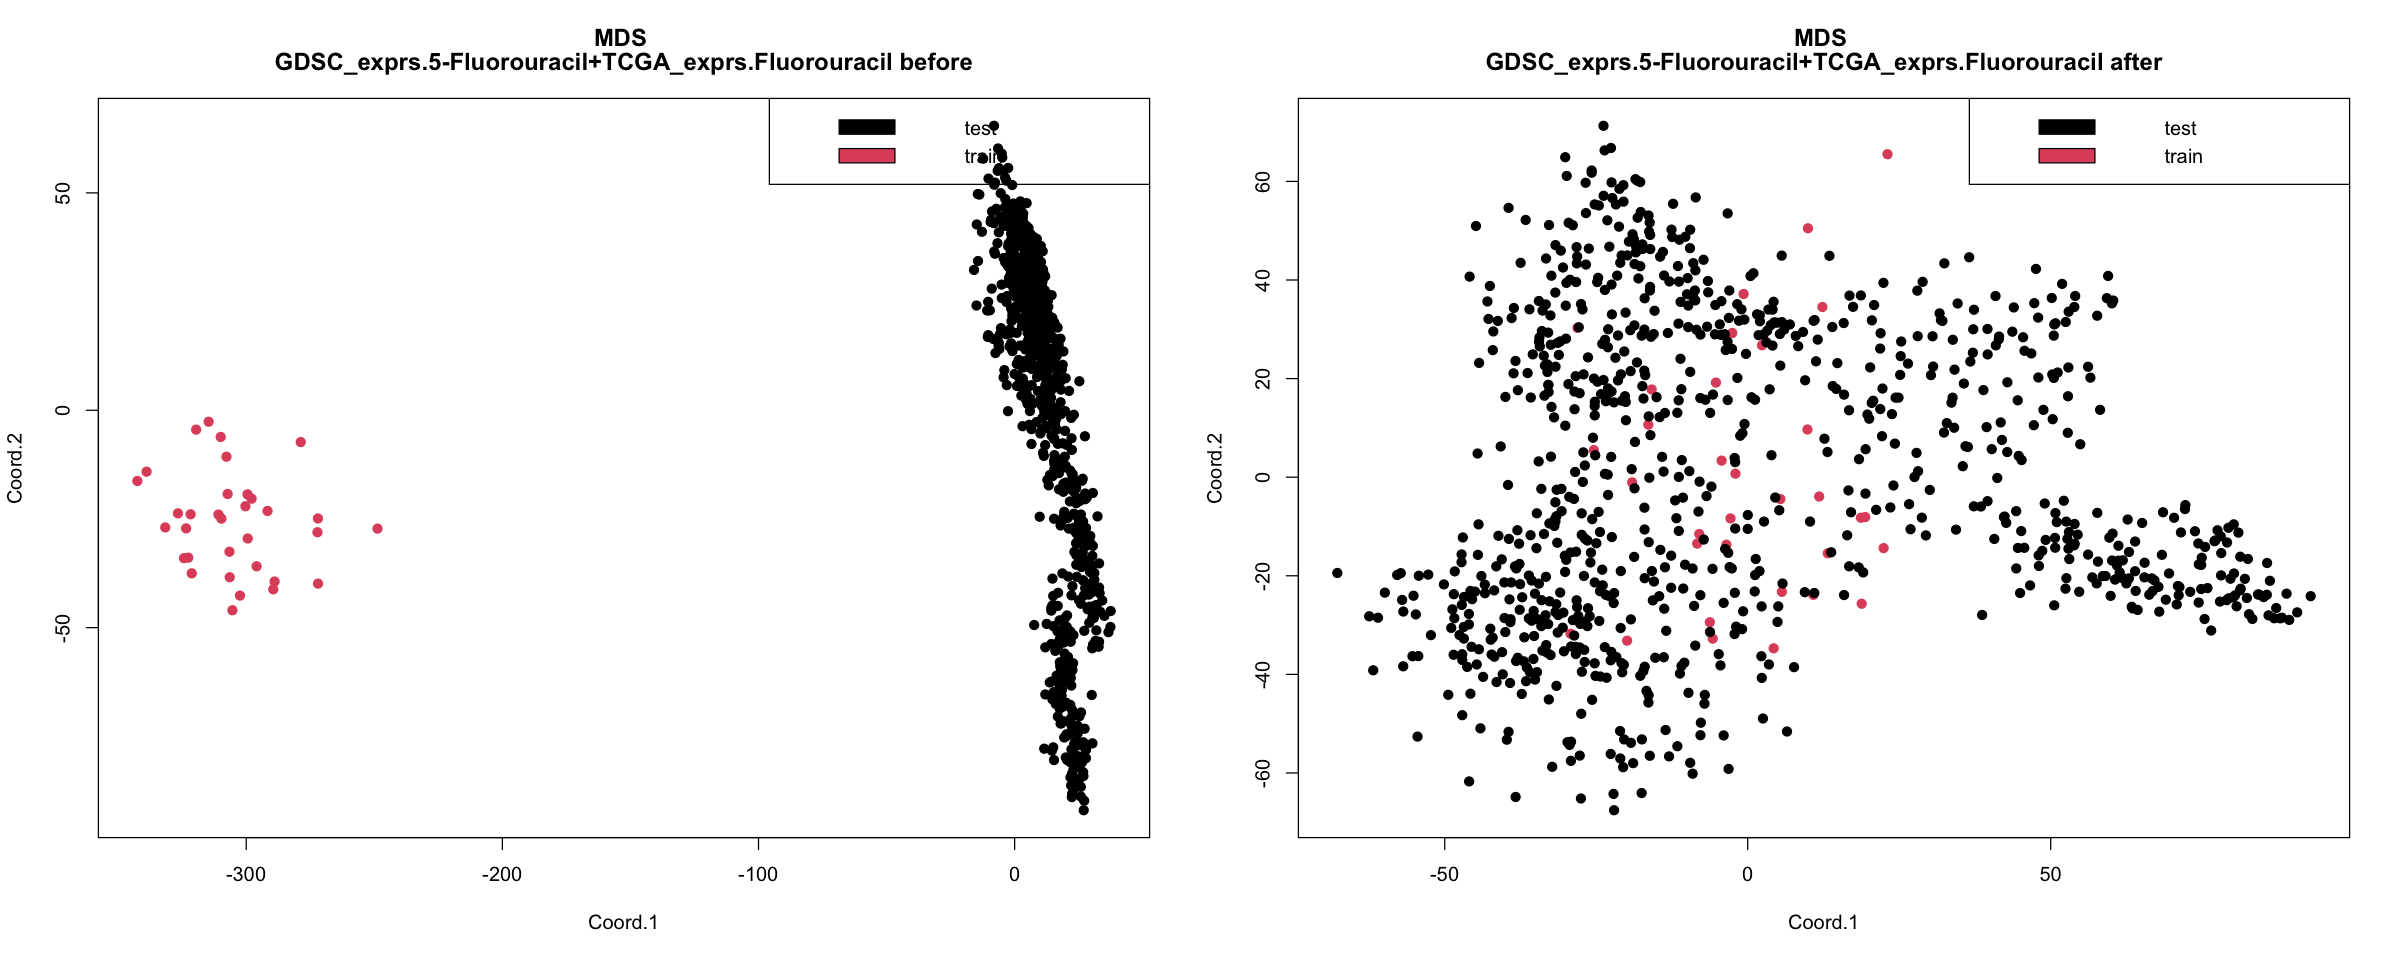

[1] "write results to "                                                                                                                            
[2] "/Volumes/Expansion/Thesis Work/Results/preprocessed_results2/exprs_homogenized/PDX_exprs.5-Fluorouracil.eb_with.GDSC_exprs.5-Fluorouracil.tsv"
[3] "/Volumes/Expansion/Thesis Work/Results/preprocessed_results2/exprs_homogenized/GDSC_exprs.5-Fluorouracil.eb_with.PDX_exprs.5-Fluorouracil.tsv"
[1] "/Volumes/Expansion/Thesis Work/Results/preprocessed_results2/exprs/GDSC_exprs.5-Fluorouracil.tsv"
[2] "/Volumes/Expansion/Thesis Work/Results/preprocessed_results2/exprs/PDX_exprs.5-Fluorouracil.tsv" 

 18189  gene identifiers overlap between the supplied expression matrices... 
 Found 886 genes with uniform expression within a single batch (all zeros); these will not be adjusted for batch.


Found2batches

Adjusting for0covariate(s) or covariate level(s)

Standardizing Data across genes

Fitting L/S model and finding priors

Finding parametric adjustments

Adjusting the Data




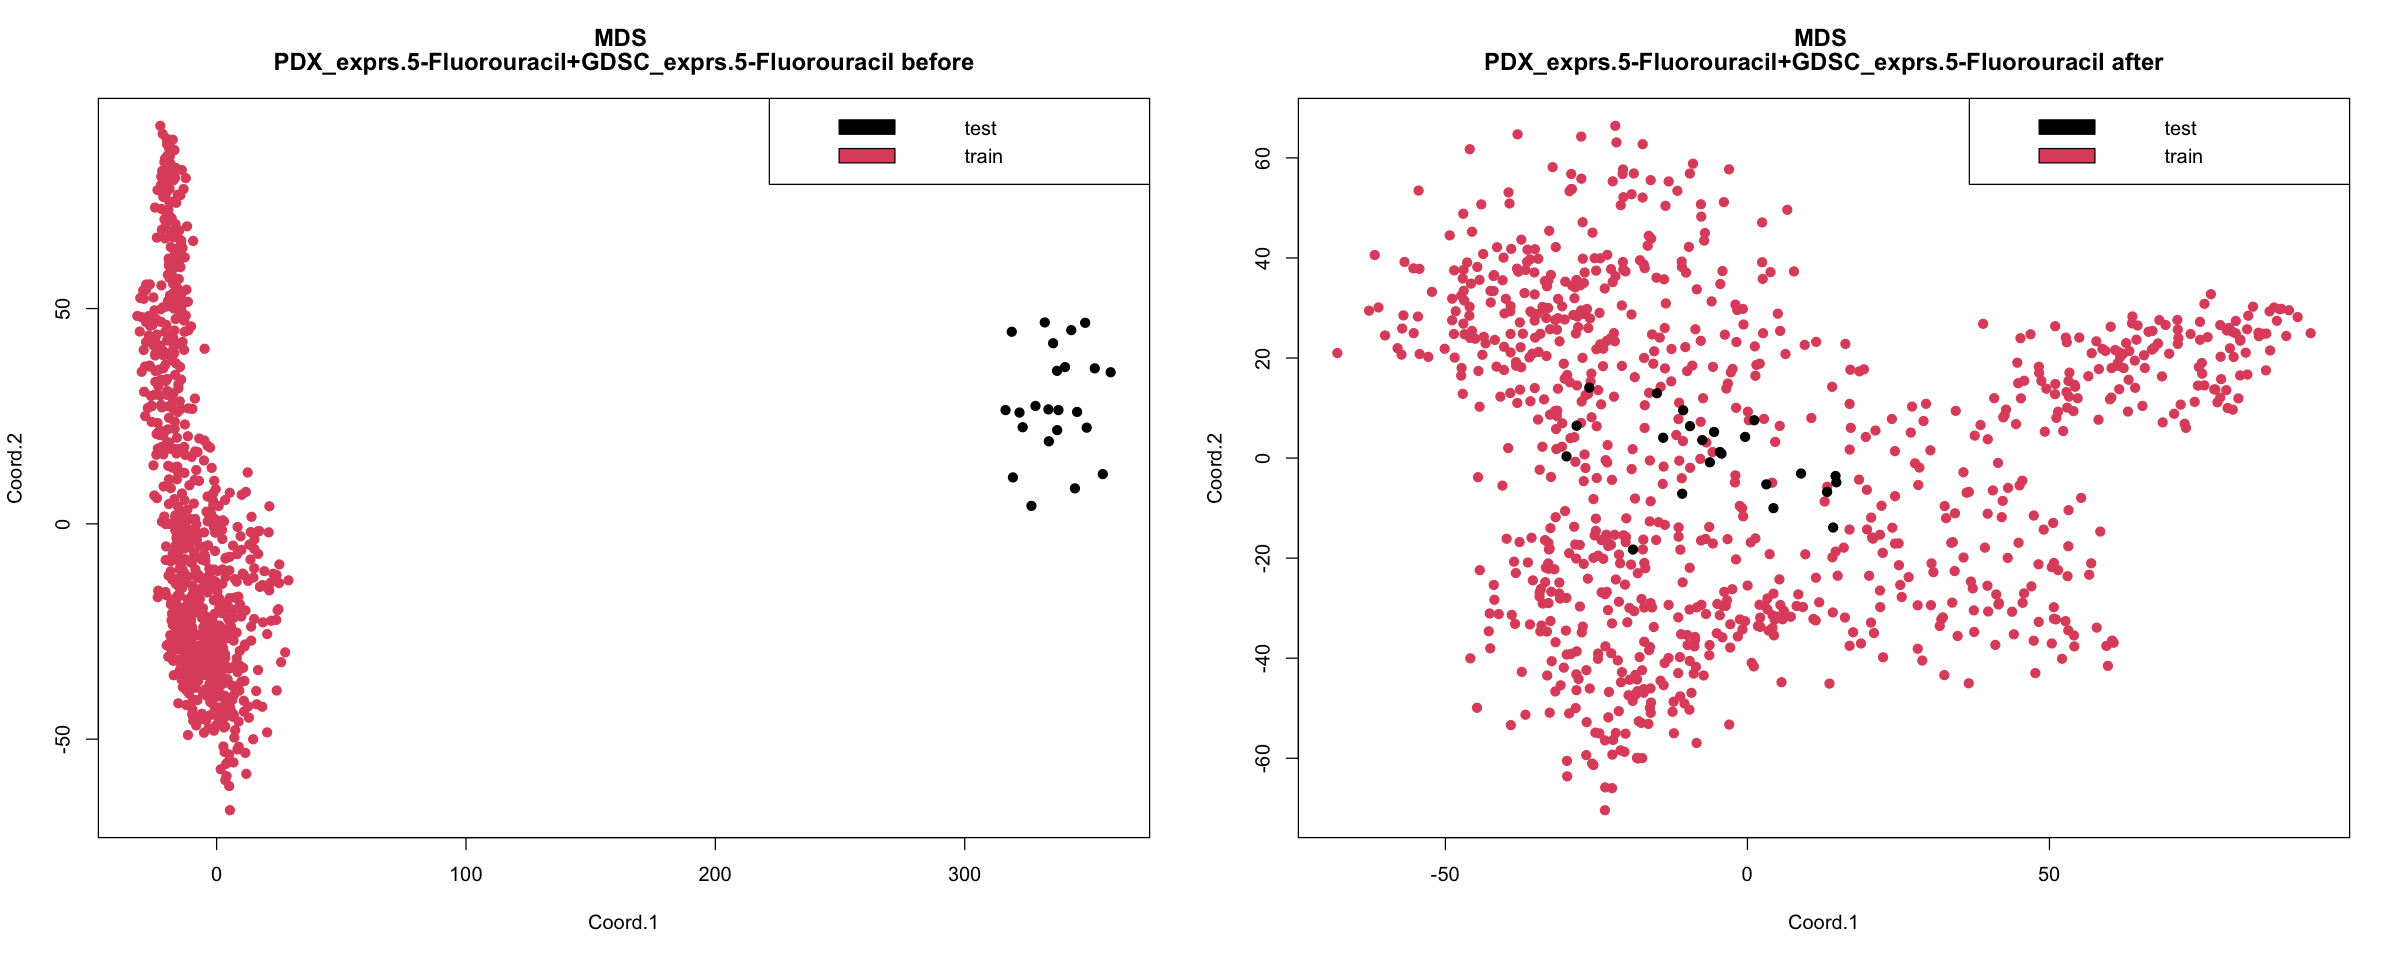

[1] "write results to "                                                                                                                            
[2] "/Volumes/Expansion/Thesis Work/Results/preprocessed_results2/exprs_homogenized/GDSC_exprs.5-Fluorouracil.eb_with.PDX_exprs.5-Fluorouracil.tsv"
[3] "/Volumes/Expansion/Thesis Work/Results/preprocessed_results2/exprs_homogenized/PDX_exprs.5-Fluorouracil.eb_with.GDSC_exprs.5-Fluorouracil.tsv"
[1] "/Volumes/Expansion/Thesis Work/Results/preprocessed_results2/exprs/GDSC_exprs.Paclitaxel.tsv"
[2] "/Volumes/Expansion/Thesis Work/Results/preprocessed_results2/exprs/TCGA_exprs.Paclitaxel.tsv"

 18197  gene identifiers overlap between the supplied expression matrices... 
 Found 236 genes with uniform expression within a single batch (all zeros); these will not be adjusted for batch.


Found2batches

Adjusting for0covariate(s) or covariate level(s)

Standardizing Data across genes

Fitting L/S model and finding priors

Finding parametric adjustments

Adjusting the Data




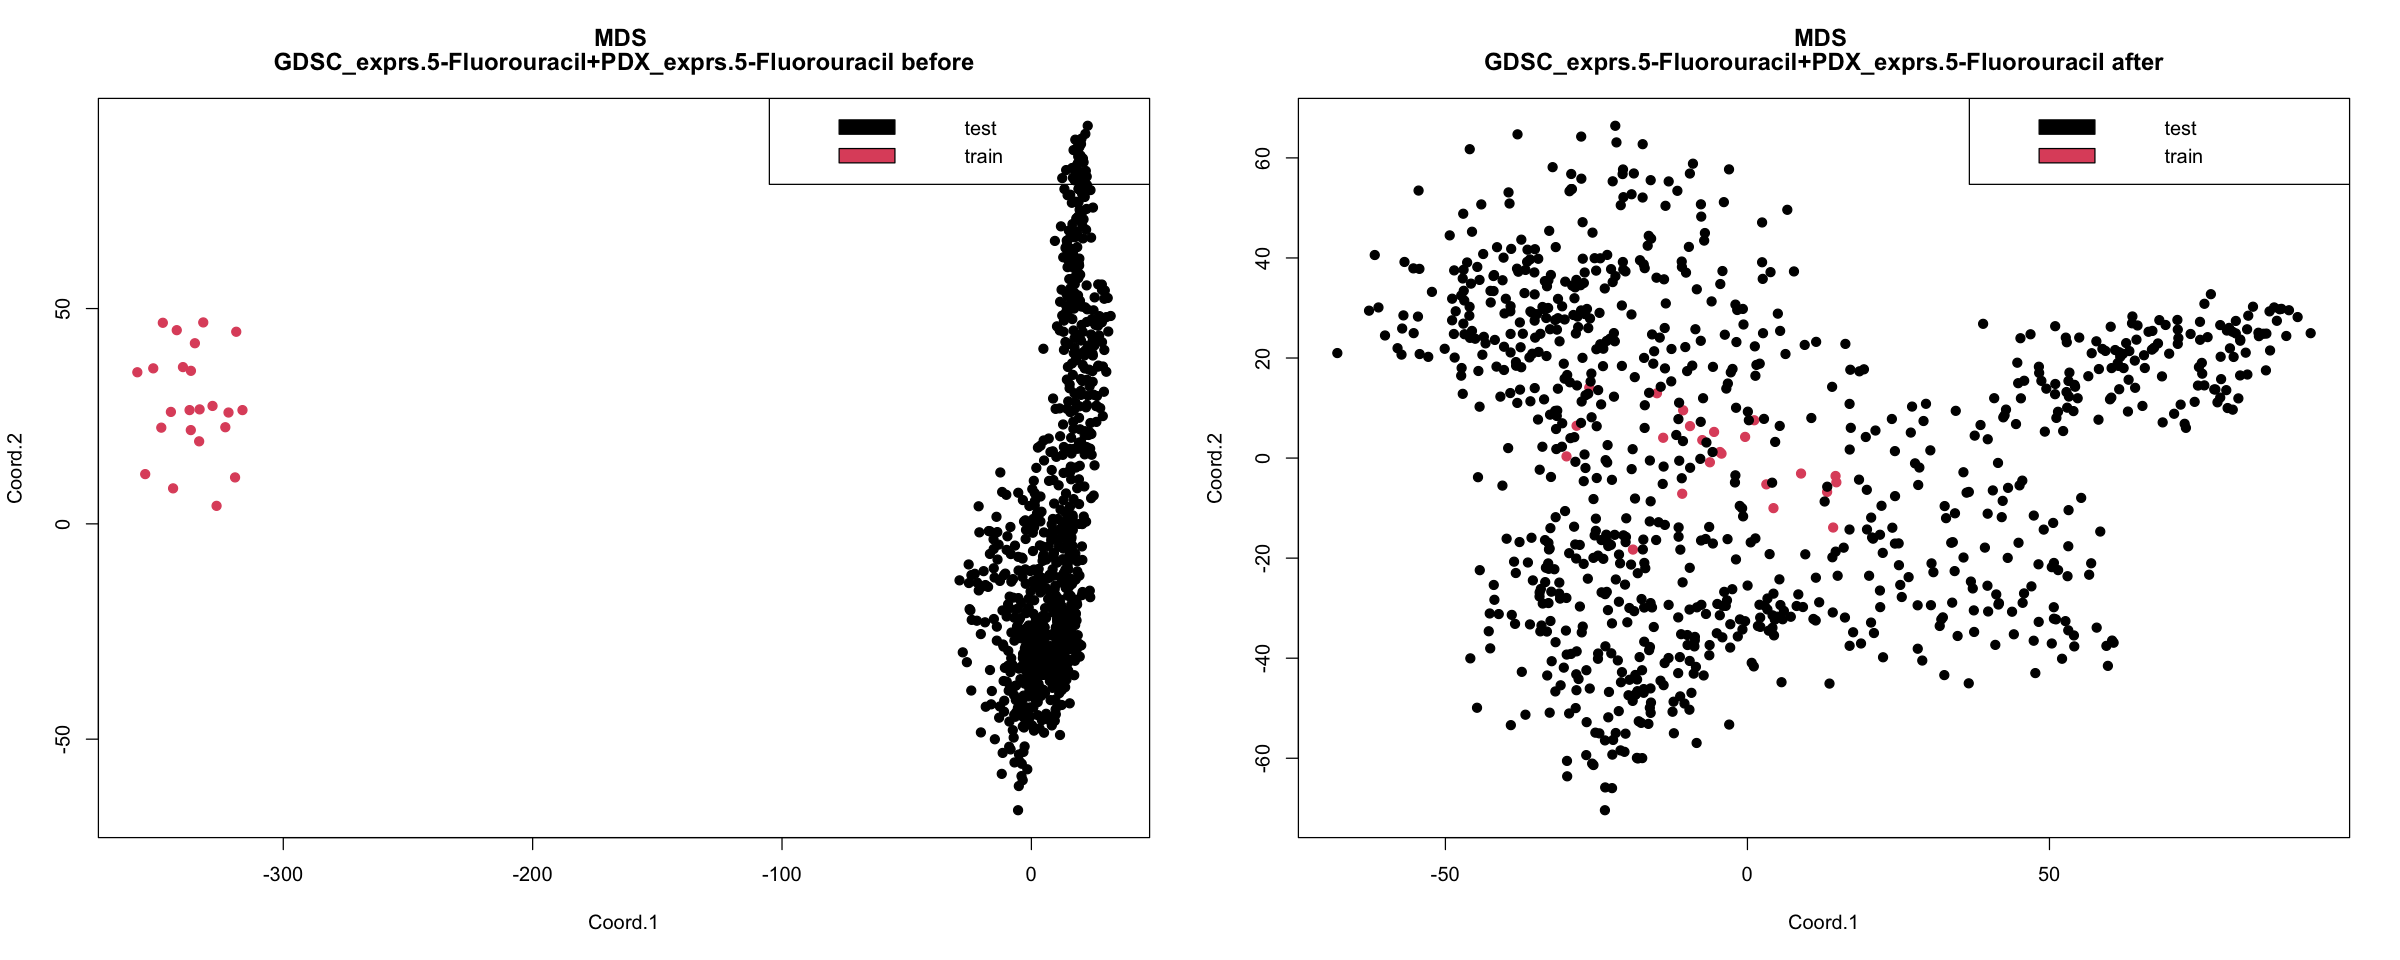

[1] "write results to "                                                                                                                     
[2] "/Volumes/Expansion/Thesis Work/Results/preprocessed_results2/exprs_homogenized/GDSC_exprs.Paclitaxel.eb_with.TCGA_exprs.Paclitaxel.tsv"
[3] "/Volumes/Expansion/Thesis Work/Results/preprocessed_results2/exprs_homogenized/TCGA_exprs.Paclitaxel.eb_with.GDSC_exprs.Paclitaxel.tsv"
[1] "/Volumes/Expansion/Thesis Work/Results/preprocessed_results2/exprs/TCGA_exprs.Paclitaxel.tsv"
[2] "/Volumes/Expansion/Thesis Work/Results/preprocessed_results2/exprs/GDSC_exprs.Paclitaxel.tsv"

 18197  gene identifiers overlap between the supplied expression matrices... 
 Found 236 genes with uniform expression within a single batch (all zeros); these will not be adjusted for batch.


Found2batches

Adjusting for0covariate(s) or covariate level(s)

Standardizing Data across genes

Fitting L/S model and finding priors

Finding parametric adjustments

Adjusting the Data




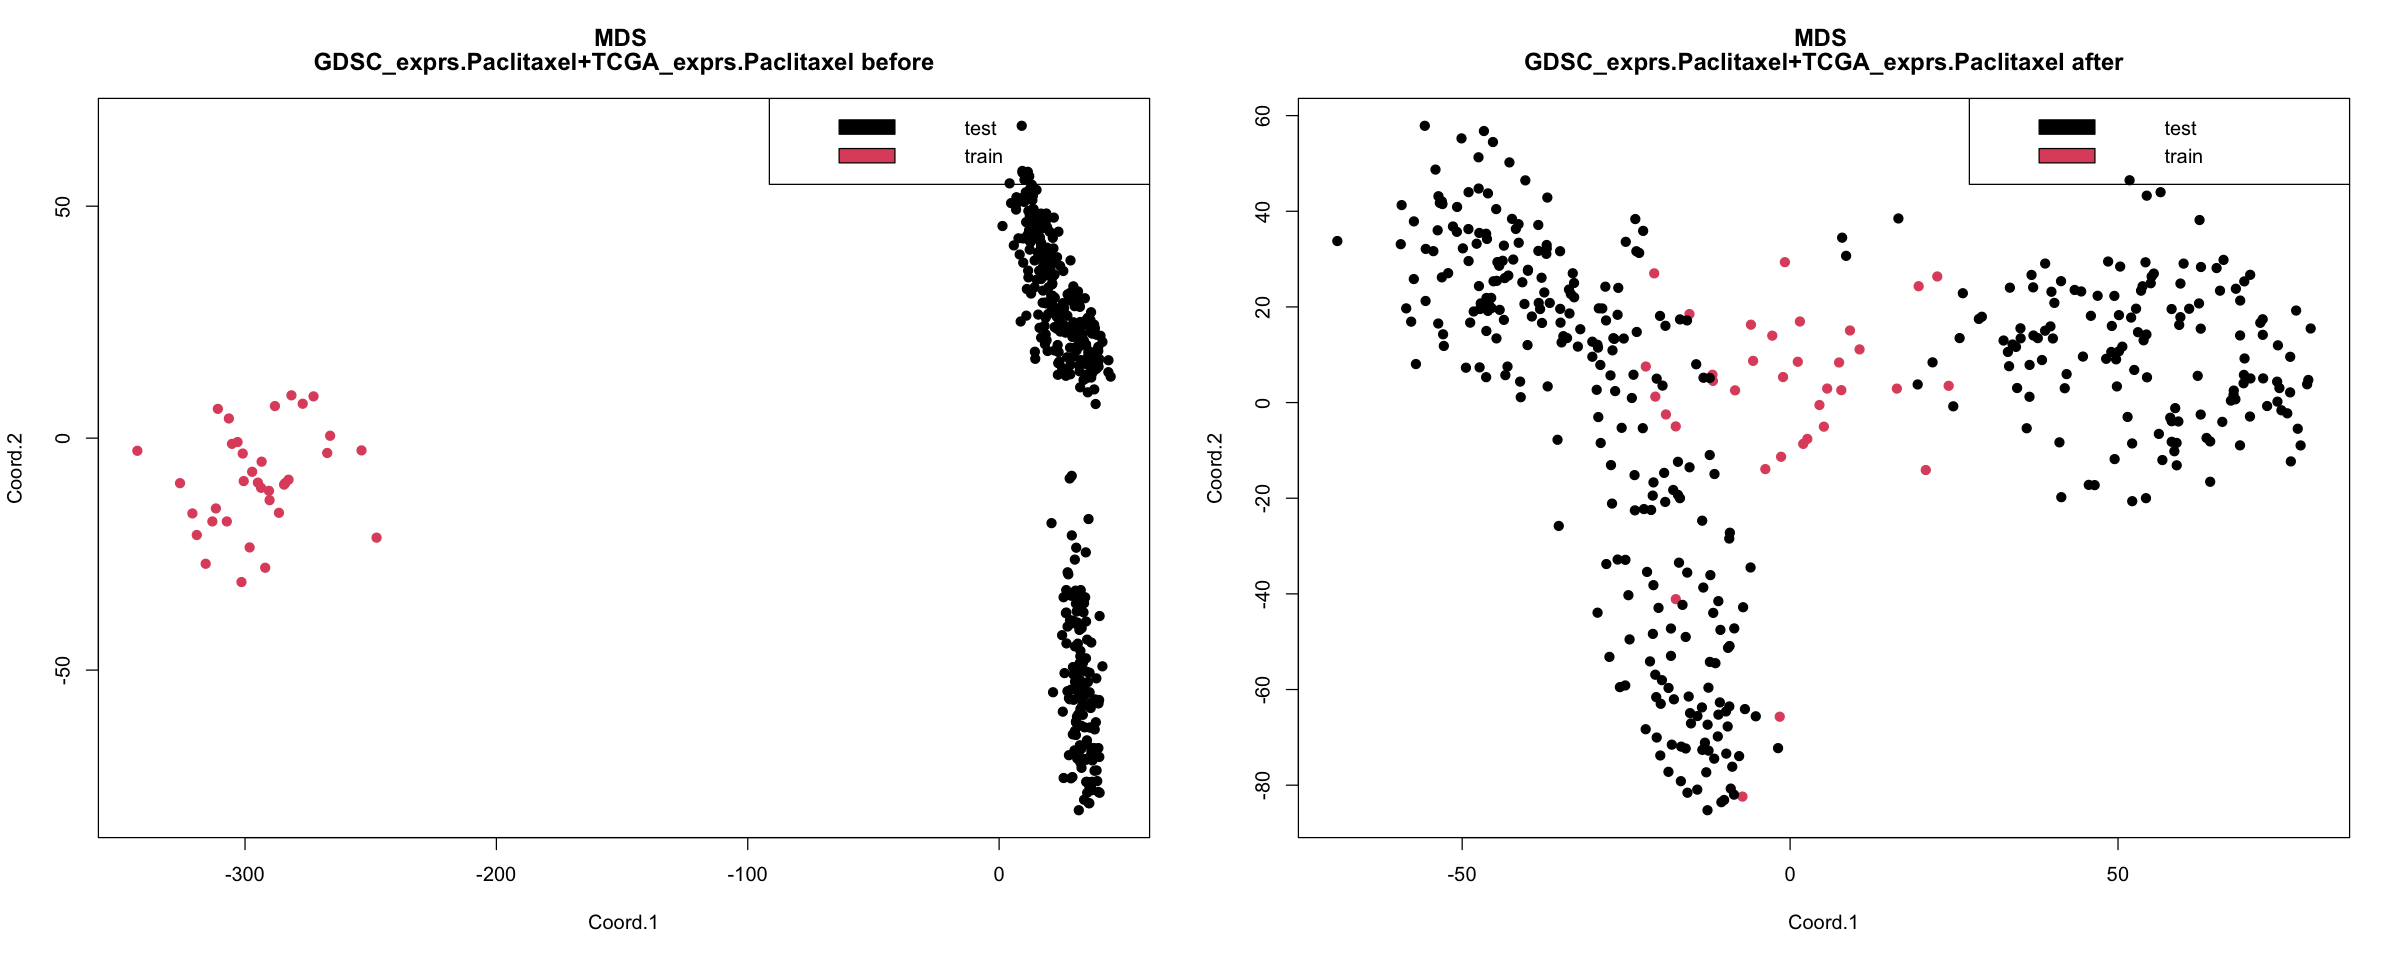

[1] "write results to "                                                                                                                     
[2] "/Volumes/Expansion/Thesis Work/Results/preprocessed_results2/exprs_homogenized/TCGA_exprs.Paclitaxel.eb_with.GDSC_exprs.Paclitaxel.tsv"
[3] "/Volumes/Expansion/Thesis Work/Results/preprocessed_results2/exprs_homogenized/GDSC_exprs.Paclitaxel.eb_with.TCGA_exprs.Paclitaxel.tsv"
[1] "/Volumes/Expansion/Thesis Work/Results/preprocessed_results2/exprs/GDSC_exprs.Paclitaxel.tsv"
[2] "/Volumes/Expansion/Thesis Work/Results/preprocessed_results2/exprs/PDX_exprs.Paclitaxel.tsv" 

 18189  gene identifiers overlap between the supplied expression matrices... 
 Found 360 genes with uniform expression within a single batch (all zeros); these will not be adjusted for batch.


Found2batches

Adjusting for0covariate(s) or covariate level(s)

Standardizing Data across genes

Fitting L/S model and finding priors

Finding parametric adjustments

Adjusting the Data




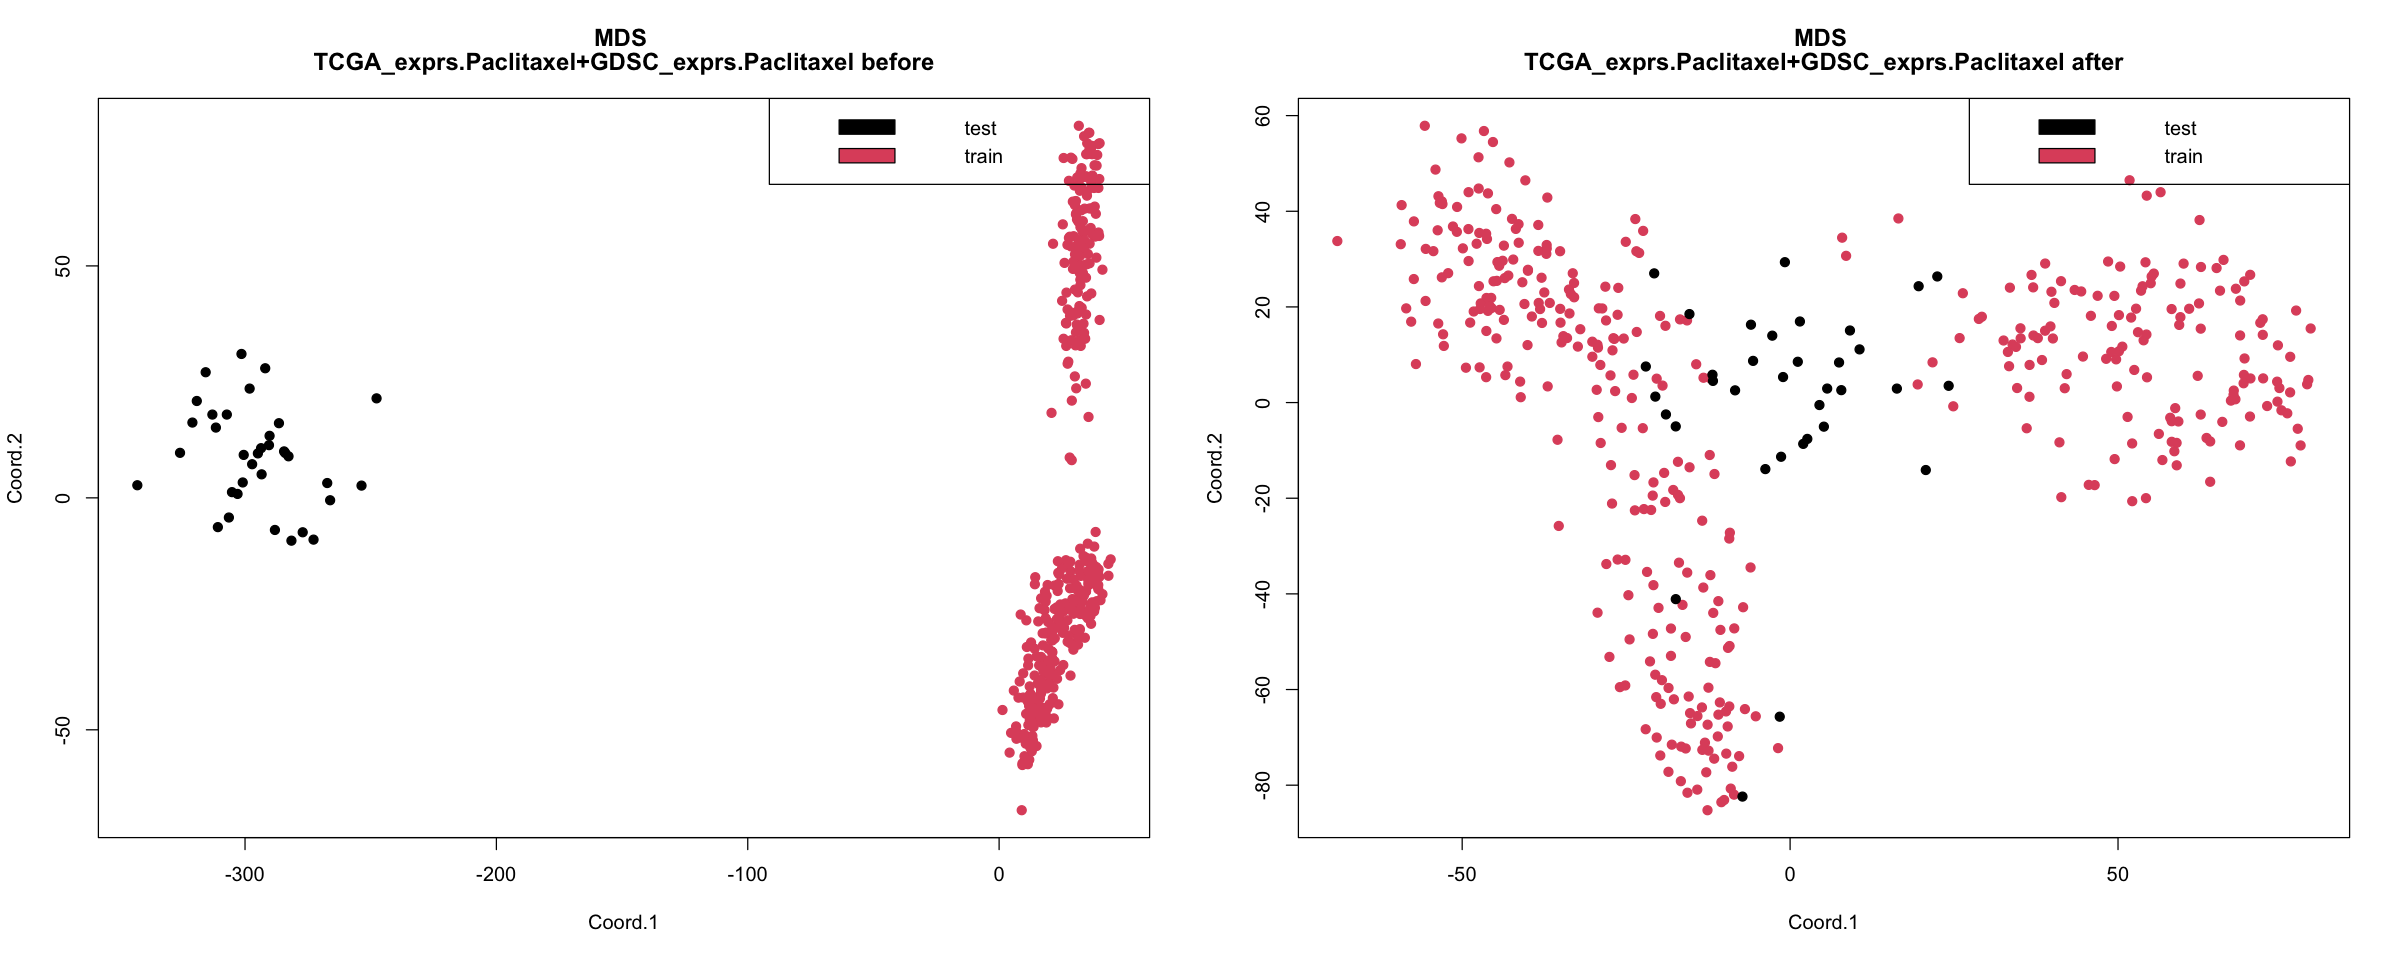

[1] "write results to "                                                                                                                    
[2] "/Volumes/Expansion/Thesis Work/Results/preprocessed_results2/exprs_homogenized/GDSC_exprs.Paclitaxel.eb_with.PDX_exprs.Paclitaxel.tsv"
[3] "/Volumes/Expansion/Thesis Work/Results/preprocessed_results2/exprs_homogenized/PDX_exprs.Paclitaxel.eb_with.GDSC_exprs.Paclitaxel.tsv"
[1] "/Volumes/Expansion/Thesis Work/Results/preprocessed_results2/exprs/PDX_exprs.Paclitaxel.tsv" 
[2] "/Volumes/Expansion/Thesis Work/Results/preprocessed_results2/exprs/GDSC_exprs.Paclitaxel.tsv"

 18189  gene identifiers overlap between the supplied expression matrices... 
 Found 360 genes with uniform expression within a single batch (all zeros); these will not be adjusted for batch.


Found2batches

Adjusting for0covariate(s) or covariate level(s)

Standardizing Data across genes

Fitting L/S model and finding priors

Finding parametric adjustments

Adjusting the Data




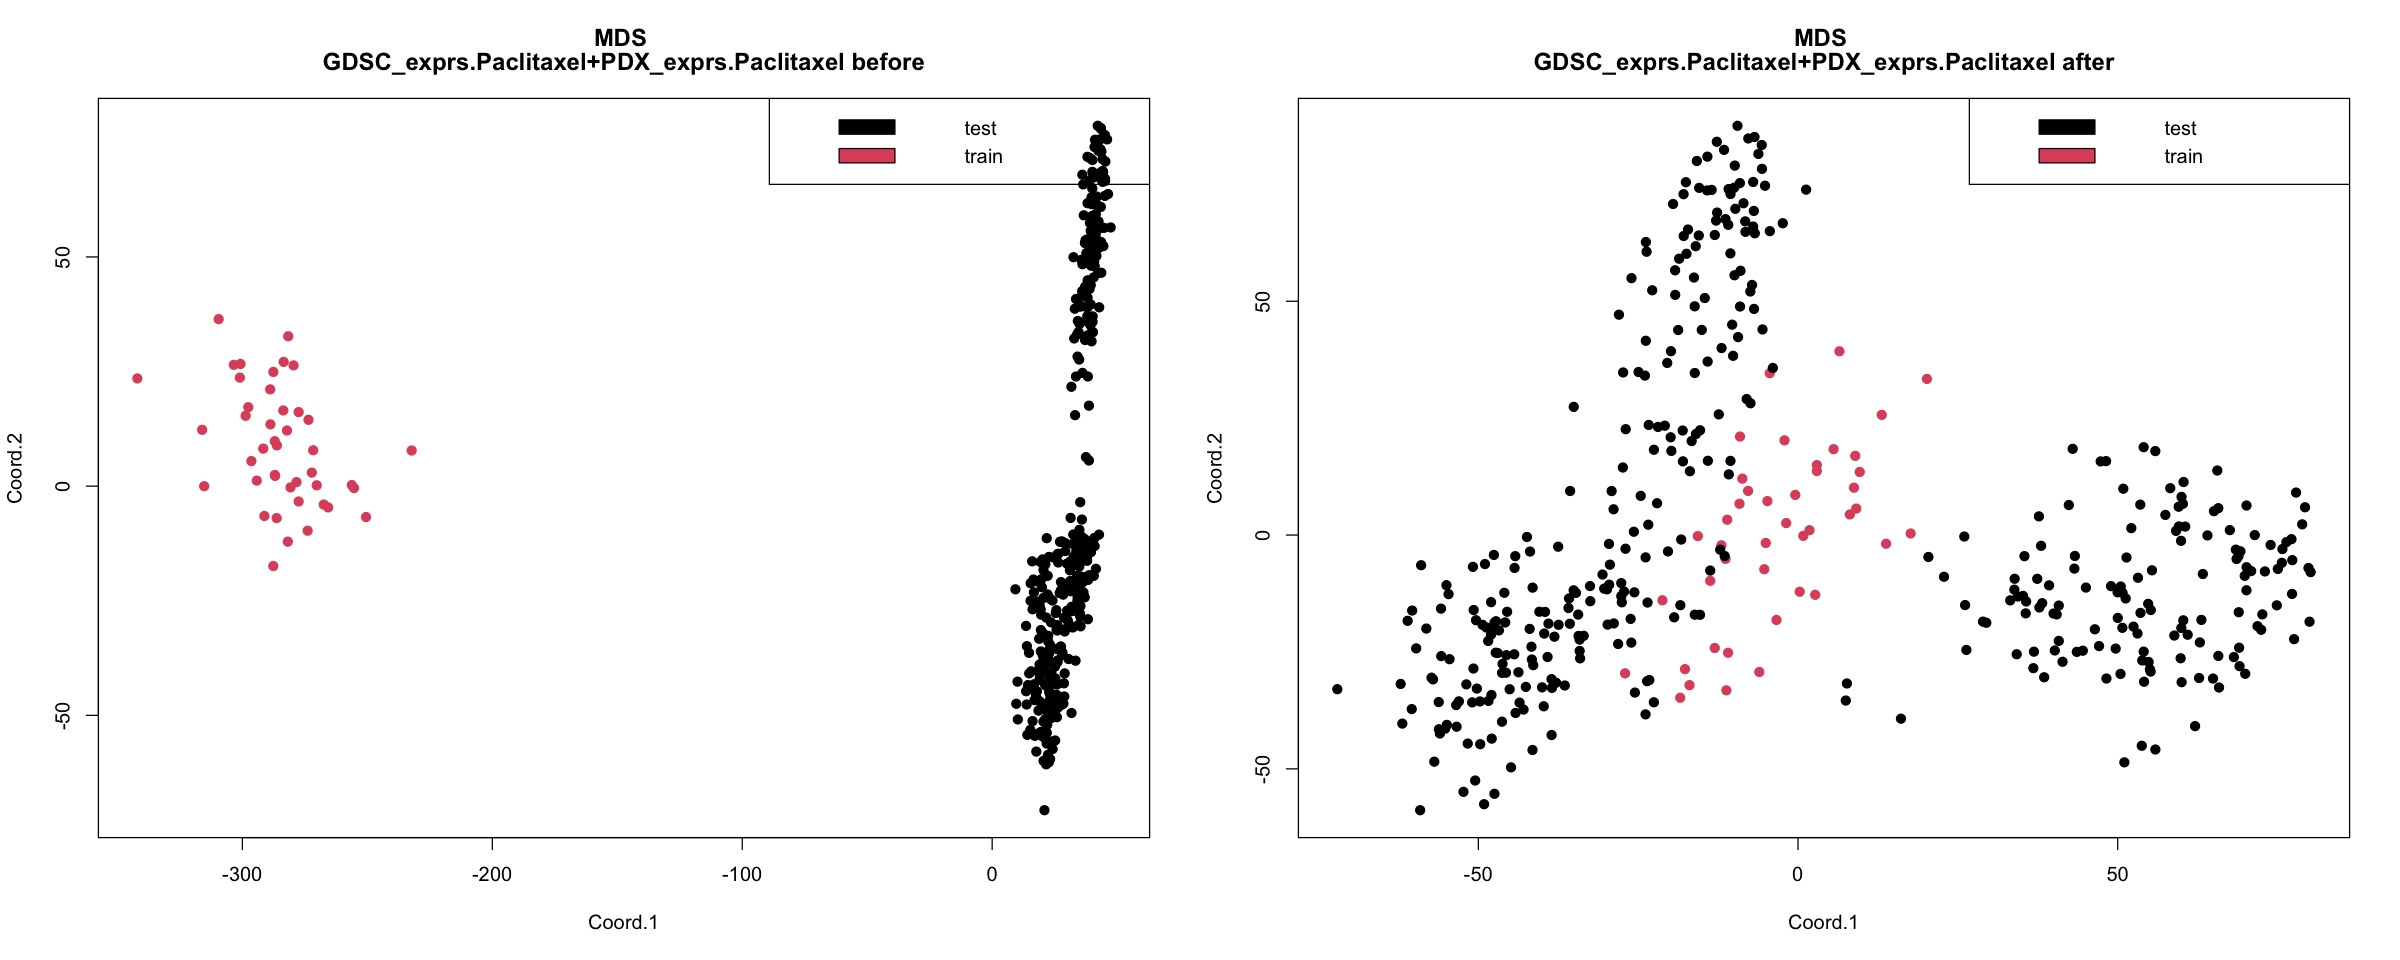

[1] "write results to "                                                                                                                    
[2] "/Volumes/Expansion/Thesis Work/Results/preprocessed_results2/exprs_homogenized/PDX_exprs.Paclitaxel.eb_with.GDSC_exprs.Paclitaxel.tsv"
[3] "/Volumes/Expansion/Thesis Work/Results/preprocessed_results2/exprs_homogenized/GDSC_exprs.Paclitaxel.eb_with.PDX_exprs.Paclitaxel.tsv"
[1] "/Volumes/Expansion/Thesis Work/Results/preprocessed_results2/exprs/PDX_exprs.Docetaxel.tsv" 
[2] "/Volumes/Expansion/Thesis Work/Results/preprocessed_results2/exprs/GDSC_exprs.Docetaxel.tsv"


Warning message in file(file, "rt"):
“dosya '/Volumes/Expansion/Thesis Work/Results/preprocessed_results2/exprs/PDX_exprs.Docetaxel.tsv' açılamadı: No such file or directory”


ERROR: Error in file(file, "rt"): bağlantı açılamadı


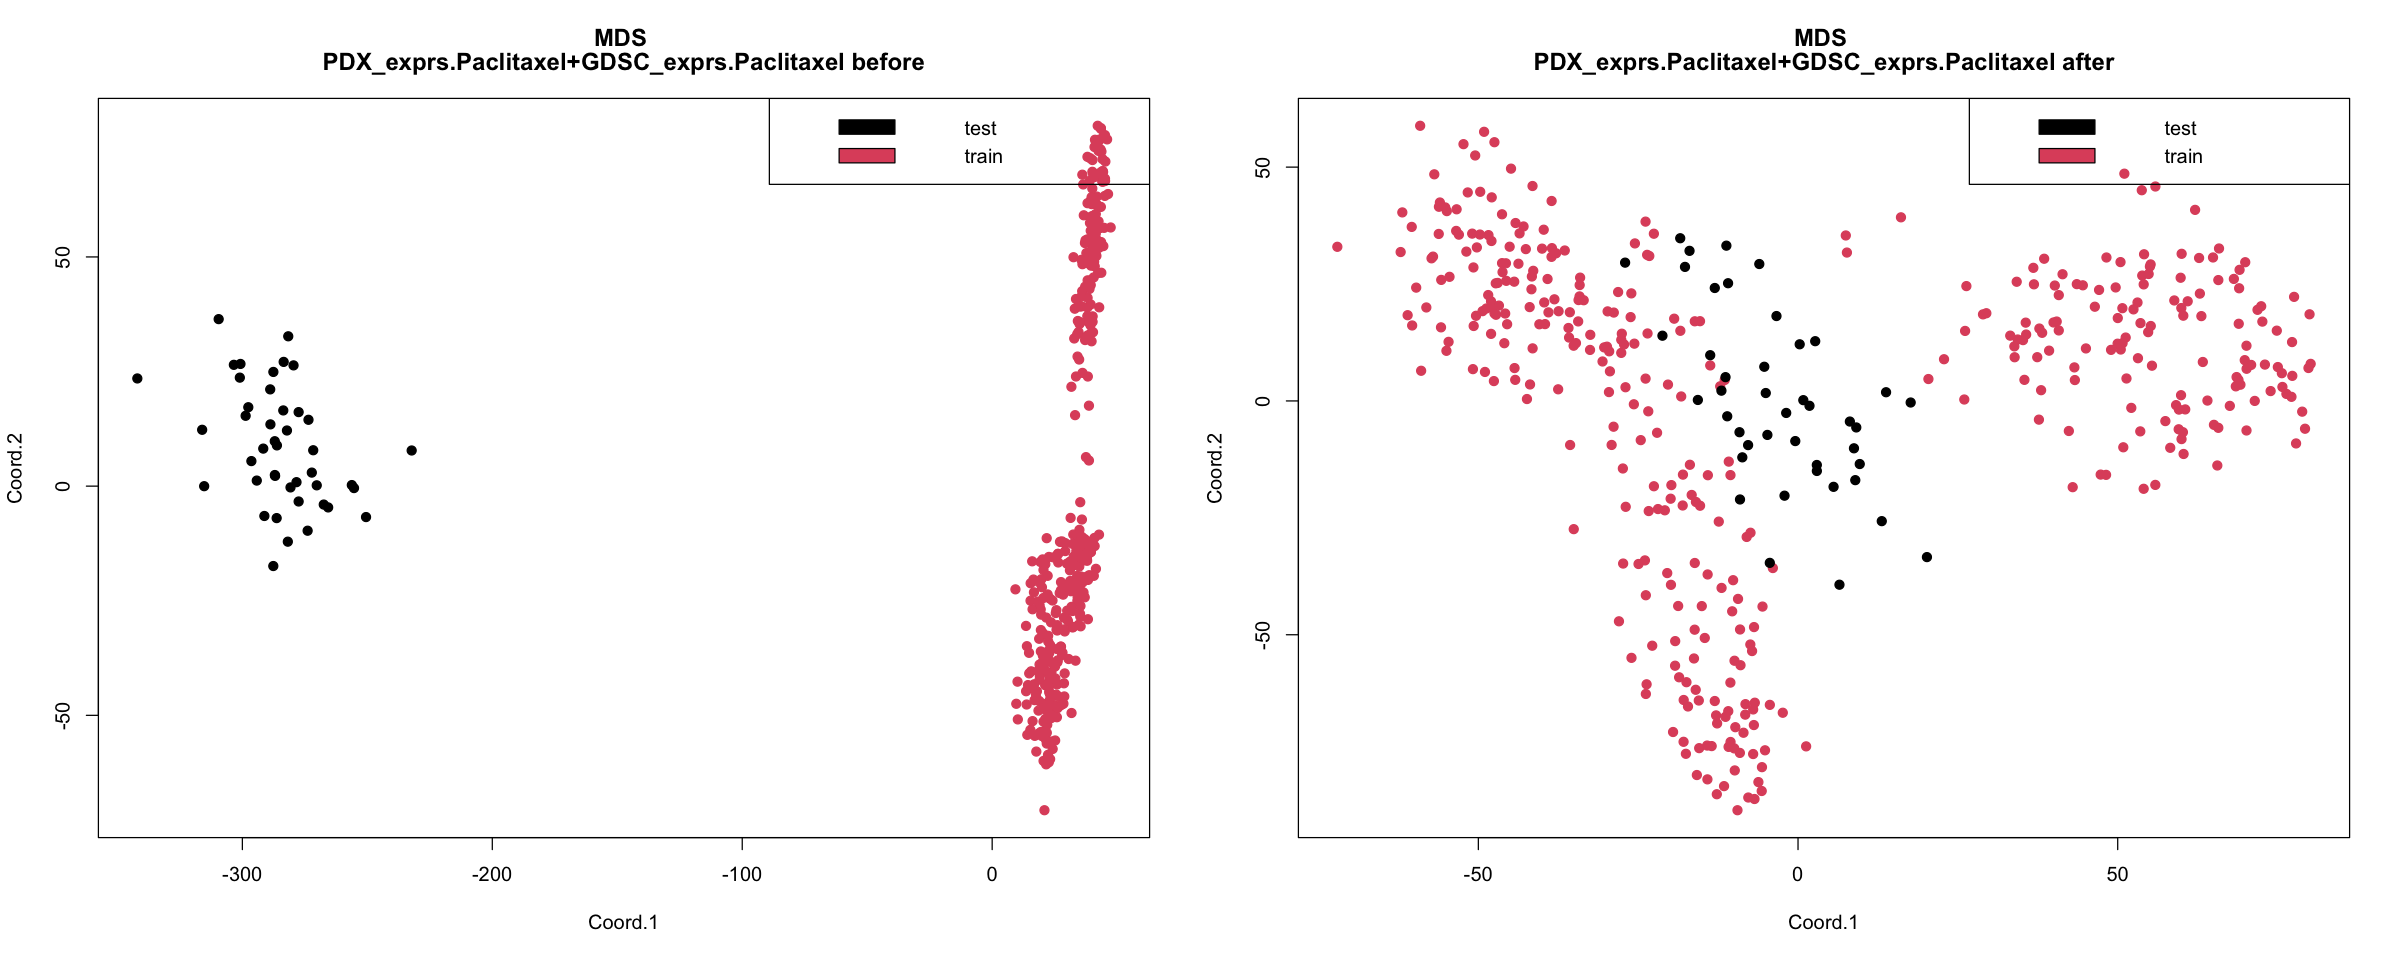

In [4]:
# run "homogenize_data.R" to remove batch effects

pairs <- list(list("GDSC_exprs.Cetuximab.tsv","TCGA_exprs.Cetuximab.tsv"),
              list("TCGA_exprs.Cetuximab.tsv","GDSC_exprs.Cetuximab.tsv"),
              list("GDSC_exprs.Cetuximab.tsv","PDX_exprs.Cetuximab.tsv"),
              list("PDX_exprs.Cetuximab.tsv","GDSC_exprs.Cetuximab.tsv"),
              list("TCGA_exprs.Doxorubicin.tsv","GDSC_exprs.Doxorubicin.tsv"),
              list("GDSC_exprs.Doxorubicin.tsv","TCGA_exprs.Doxorubicin.tsv"),
              list("TCGA_exprs.Gemcitabine.tsv","GDSC_exprs.Gemcitabine.tsv"),
              list("GDSC_exprs.Gemcitabine.tsv","TCGA_exprs.Gemcitabine.tsv"),
              list("PDX_exprs.Gemcitabine.tsv","GDSC_exprs.Gemcitabine.tsv"),
              list("GDSC_exprs.Gemcitabine.tsv","PDX_exprs.Gemcitabine.tsv"),
              list("TCGA_exprs.Cisplatin.tsv","GDSC_exprs.Cisplatin.tsv"),
              list("GDSC_exprs.Cisplatin.tsv","TCGA_exprs.Cisplatin.tsv"),
              list("GDSC_exprs.Temozolomide.tsv","TCGA_exprs.Temozolomide.tsv"),
              list("TCGA_exprs.Temozolomide.tsv","GDSC_exprs.Temozolomide.tsv"),
              list("TCGA_exprs.Fluorouracil.tsv","GDSC_exprs.5-Fluorouracil.tsv"),
              list("GDSC_exprs.5-Fluorouracil.tsv","TCGA_exprs.Fluorouracil.tsv"),
              list("PDX_exprs.5-Fluorouracil.tsv","GDSC_exprs.5-Fluorouracil.tsv"),
              list("GDSC_exprs.5-Fluorouracil.tsv","PDX_exprs.5-Fluorouracil.tsv"),
              list("GDSC_exprs.Paclitaxel.tsv","TCGA_exprs.Paclitaxel.tsv"),
              list("TCGA_exprs.Paclitaxel.tsv","GDSC_exprs.Paclitaxel.tsv"),
              list("GDSC_exprs.Paclitaxel.tsv","PDX_exprs.Paclitaxel.tsv"),
              list("PDX_exprs.Paclitaxel.tsv","GDSC_exprs.Paclitaxel.tsv"),
              list("PDX_exprs.Docetaxel.tsv","GDSC_exprs.Docetaxel.tsv"),
              list("GDSC_exprs.Docetaxel.tsv","PDX_exprs.Docetaxel.tsv"),
              list("TCGA_exprs.Docetaxel.tsv","GDSC_exprs.Docetaxel.tsv"),
              list("GDSC_exprs.Docetaxel.tsv","TCGA_exprs.Docetaxel.tsv"),
              list("PDX_exprs.Erlotinib.tsv","GDSC_exprs.Erlotinib.tsv"),
              list("GDSC_exprs.Erlotinib.tsv","PDX_exprs.Erlotinib.tsv"))

for(pair in pairs){
  testfile <-  paste0(exprs_dir, pair[1])
  trainfile <- paste0(exprs_dir, pair[2])
  print(c(testfile, trainfile))
  homData <-  run_homogenization(testfile, trainfile,
                                 output_dir = output_dir,
                                 batch_correction=batch_correction)
}

In [5]:
sessionInfo()

R version 4.4.2 (2024-10-31)
Platform: aarch64-apple-darwin20
Running under: macOS Sequoia 15.5

Matrix products: default
BLAS:   /Library/Frameworks/R.framework/Versions/4.4-arm64/Resources/lib/libRblas.0.dylib 
LAPACK: /Library/Frameworks/R.framework/Versions/4.4-arm64/Resources/lib/libRlapack.dylib;  LAPACK version 3.12.0

locale:
[1] C/UTF-8/C/C/C/C

time zone: Europe/Istanbul
tzcode source: internal

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
[1] preprocessCore_1.68.0 sva_3.54.0            BiocParallel_1.40.0  
[4] genefilter_1.88.0     mgcv_1.9-1            nlme_3.1-166         
[7] repr_1.1.7           

loaded via a namespace (and not attached):
 [1] IRdisplay_1.1           blob_1.2.4              Biostrings_2.74.0      
 [4] fastmap_1.2.0           XML_3.99-0.17           digest_0.6.37          
 [7] lifecycle_1.0.4         survival_3.7-0          statmod_1.5.0          
[10] KEGGREST_1.46.0      